# Zadanie 1.
### Dokładny opis danych, oraz ich źródło.


Dane pochodzą z witryny:https://archive.ics.uci.edu/dataset/10/automobile

Wybrany przez nas zbiór danych Automobile pochodzi z repozytorium UCI Machine Learning Repository zawiera informacje o 205 samochodach, pochodzące z roku 1985.

Główne cechy zbioru:
- Liczba instancji: 205
- Liczba atrybutów: 26

Przykładowe ciągłe atrybuty
- engine-size: pojemność silnika
- horsepower: moc silnika
- city-mpg / highway-mpg: zużycie paliwa w mieście i na autostradzie
- peak-rpm - maksymalana wartość obrotów
- stroke - skok cylindra
- curb-weight - waga samochodu z płynami
- bore - średnica tłoka
- price: cena pojazdu (w dolarach amerykańskich)


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.utils import resample
from ucimlrepo import fetch_ucirepo

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("viridis")

automobile = fetch_ucirepo(id=10)

X = automobile.data.features
y = automobile.data.targets
df = pd.concat([X, y], axis=1)

print(f"Nazwa zbioru danych: {automobile.metadata.name}")
print(f"Liczba instancji: {automobile.metadata.num_instances}")
print(f"Liczba atrybutów: {automobile.metadata.num_features}")

print("\nStruktura danych:")
print(df.info())

print("\nPierwszych 5 wierszy danych:")
print(df.head())

continuous_vars = [
    'normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price',
    'engine-size', 'curb-weight', 'height', 'width', 'length', 'wheel-base',
    'compression-ratio', 'city-mpg', 'highway-mpg'
]

continuous_df = df[continuous_vars]
print(continuous_df.describe().T)

print("\nLiczba brakujących wartości w każdej kolumnie:")
print(df.isnull().sum())

Nazwa zbioru danych: Automobile
Liczba instancji: 205
Liczba atrybutów: 25

Struktura danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-n

# Zadanie 2.
### Estymacja parametrów rozkładu (punktowa) (średnia, odchylenie standardowe, odchylenie przeciętne, mediana, moda, wariancja, kurtoza, skośność, IQR, kwantyle, itp)



--- Tabela porównawcza głównych parametrów rozkładu dla zmiennych ciągłych ---



--- Parametry zmiennej 'price' ---



--- Parametry zmiennej 'horsepower' ---



--- Parametry zmiennej 'engine-size' ---



--- Parametry zmiennej 'curb-weight' ---



--- Parametry zmiennej 'city-mpg' ---



--- Parametry zmiennej 'highway-mpg' ---


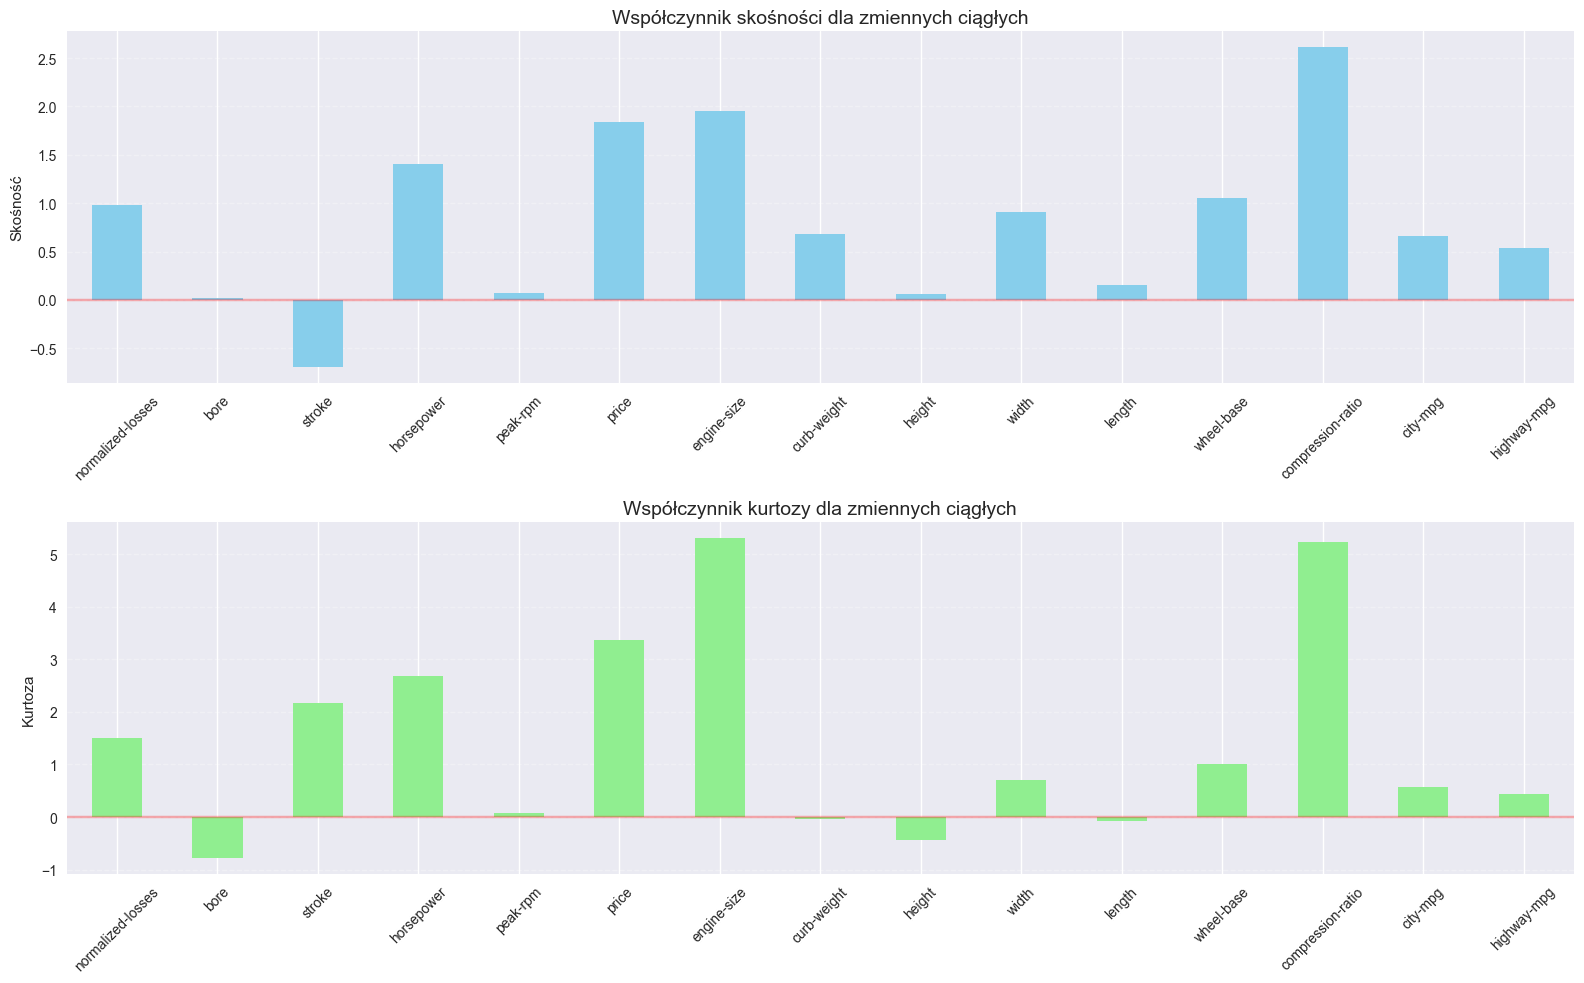

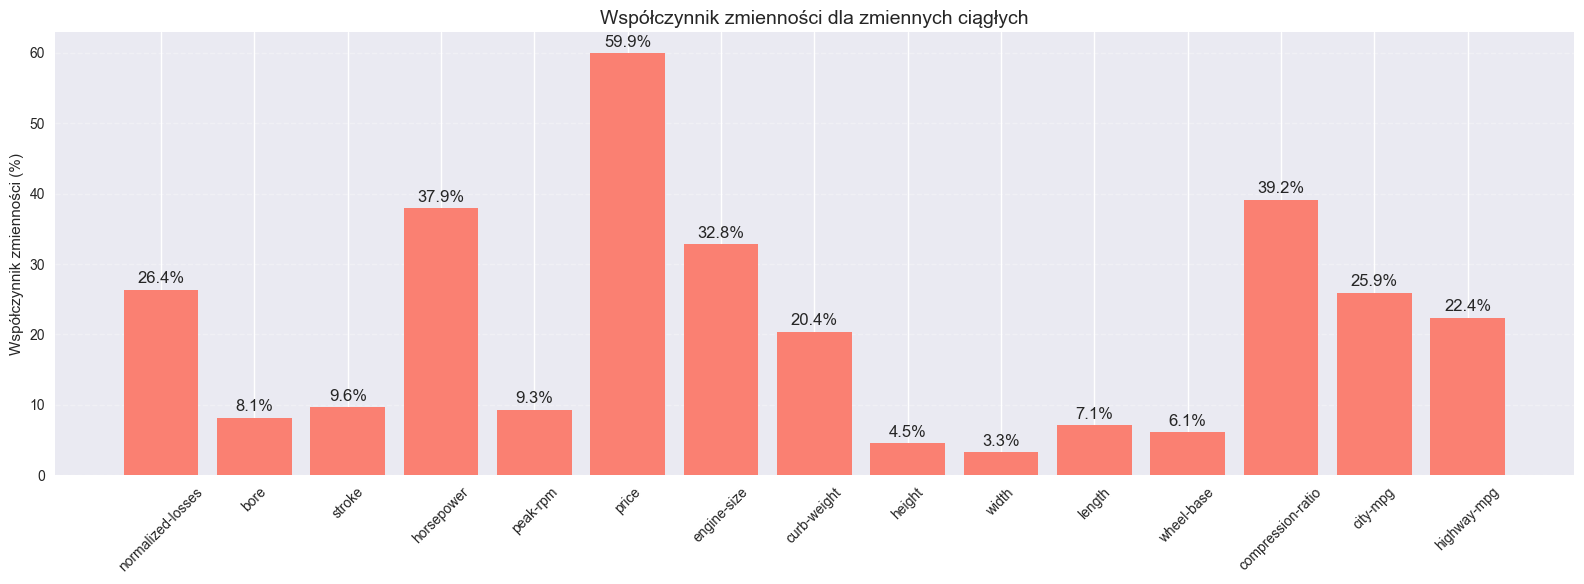

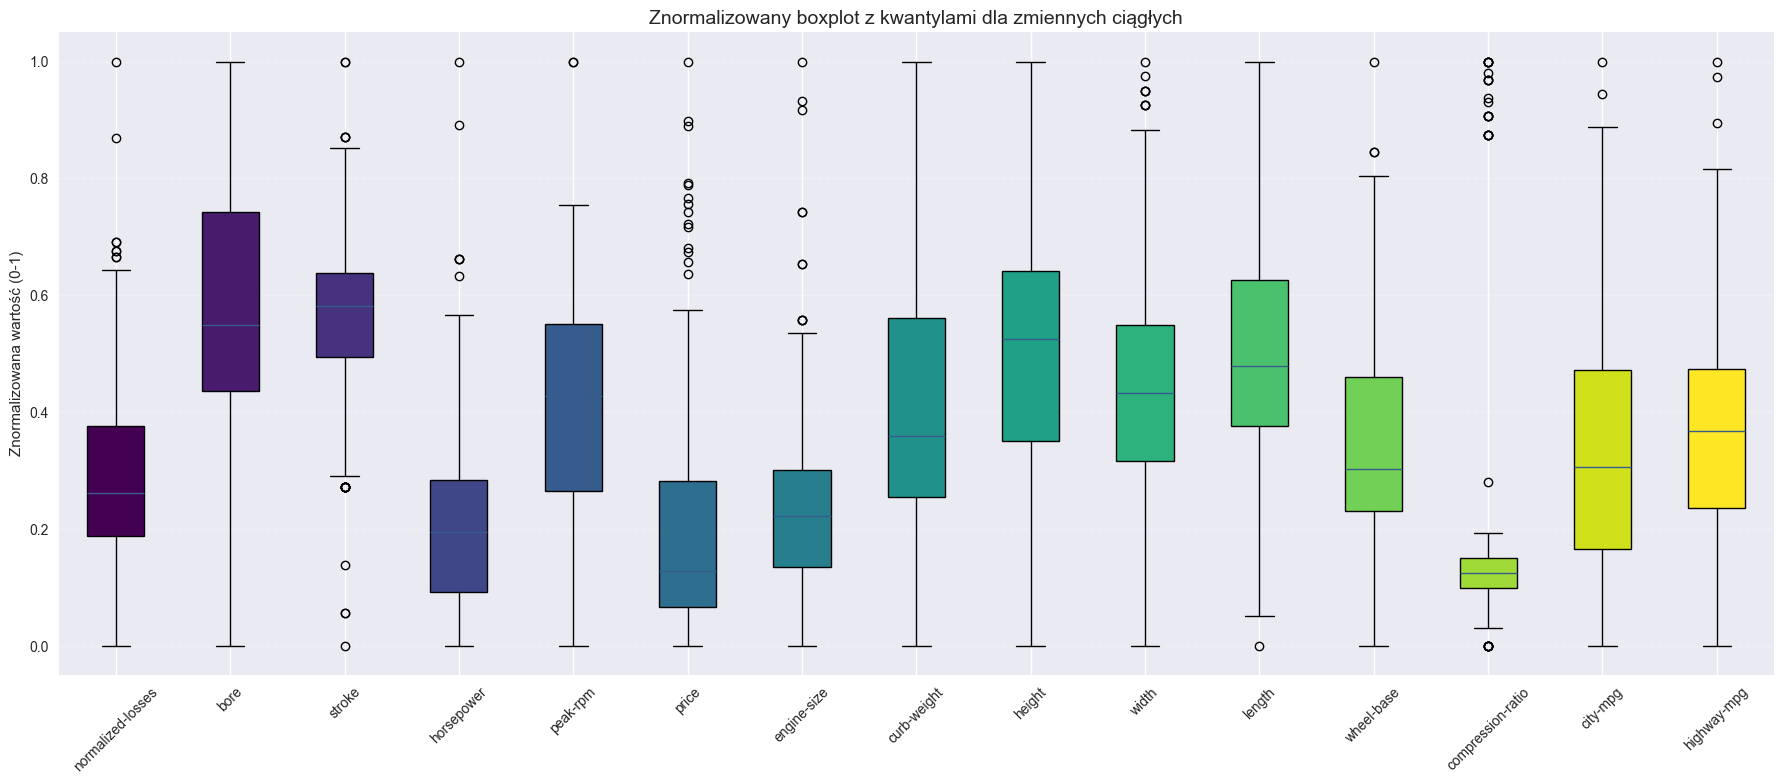


--- Interpretacja wybranych parametrów rozkładu dla zmiennych ciągłych ---


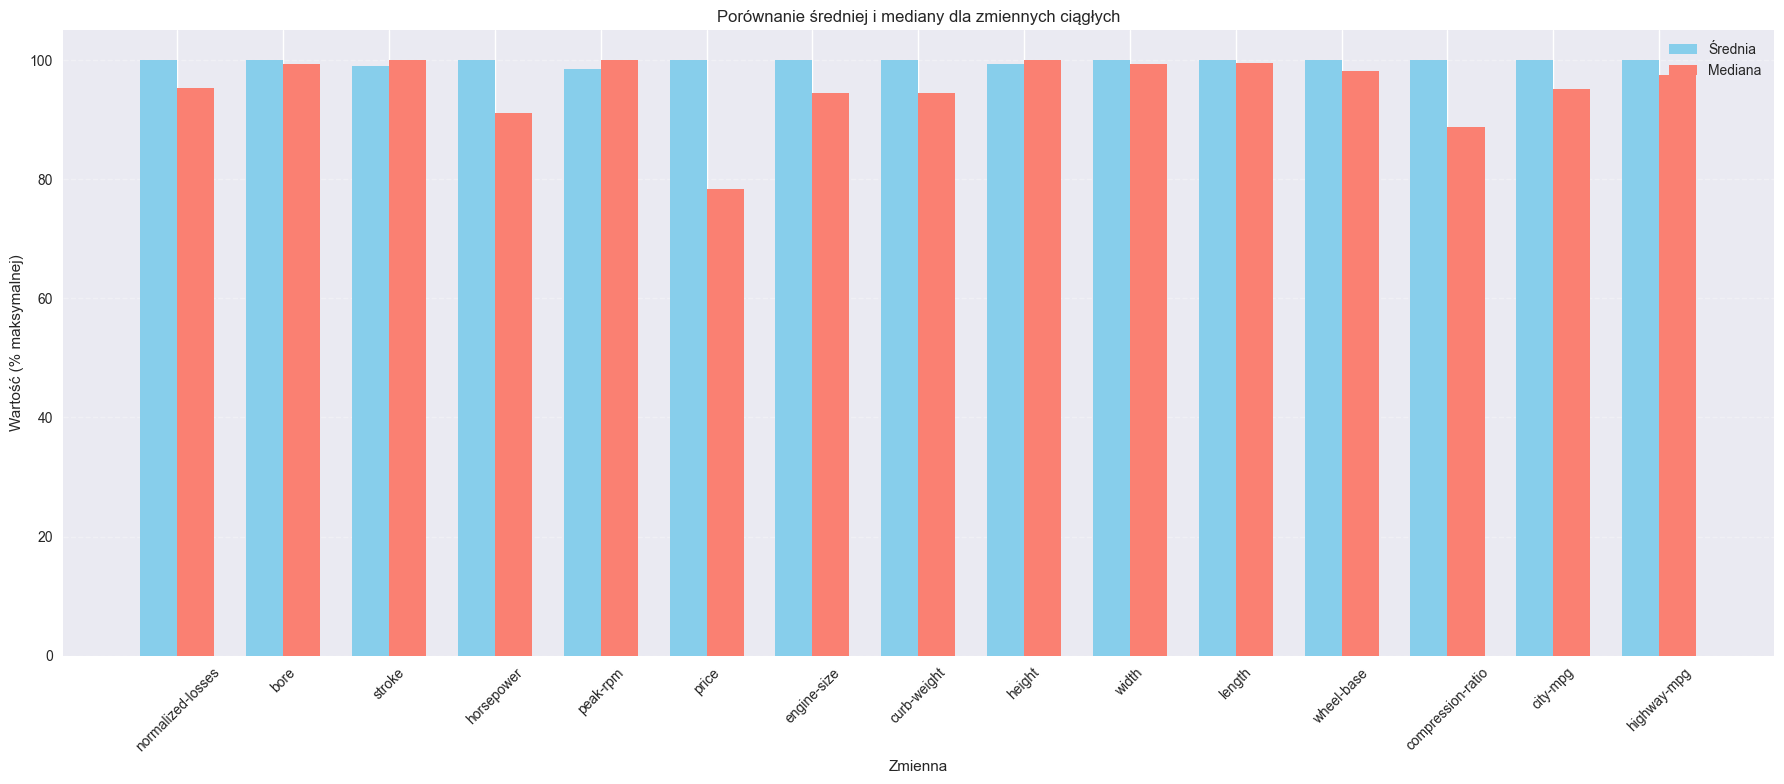

In [10]:
# Przetworzenie brakujących wartości w zmiennych ciągłych
for column in continuous_vars:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].fillna(df[column].median())

# Funkcja do obliczania parametrów rozkładu
def calculate_distribution_parameters(data):
    params = {}
    # Miary tendencji centralnej
    params['Średnia'] = data.mean()
    params['Średnia geometryczna'] = stats.gmean(data) if all(data > 0) else np.nan
    params['Średnia harmoniczna'] = stats.hmean(data) if all(data > 0) else np.nan
    params['Mediana'] = data.median()
    params['Moda'] = data.mode()[0]

    # Miary rozproszenia
    params['Wariancja (próbkowa)'] = data.var(ddof=1)
    params['Wariancja (populacyjna)'] = data.var(ddof=0)
    params['Odchylenie standardowe (próbkowe)'] = data.std(ddof=1)
    params['Odchylenie standardowe (populacyjne)'] = data.std(ddof=0)
    params['Odchylenie przeciętne'] = (data - data.mean()).abs().mean()
    params['Odchylenie ćwiartkowe'] = (np.percentile(data, 75) - np.percentile(data, 25))/2
    params['Współczynnik zmienności'] = (data.std()/data.mean())*100 if data.mean() != 0 else np.nan

    # Miary kształtu rozkładu
    params['Skośność'] = stats.skew(data, bias=False)
    params['Współczynnik asymetrii Pearsona'] = 3 * (data.mean() - data.median()) / data.std() if data.std() != 0 else np.nan
    params['Kurtoza'] = stats.kurtosis(data, bias=False)
    params['Eksces'] = stats.kurtosis(data, bias=False, fisher=True)  

    # Kwantyle i miary pozycyjne
    params['Minimum'] = data.min()
    params['Maximum'] = data.max()
    params['Zakres'] = data.max() - data.min()
    params['Q1 (25%)'] = np.percentile(data, 25)
    params['Q2 (50%)'] = np.percentile(data, 50)
    params['Q3 (75%)'] = np.percentile(data, 75)
    params['P10 (10%)'] = np.percentile(data, 10)
    params['P90 (90%)'] = np.percentile(data, 90)
    params['P95 (95%)'] = np.percentile(data, 95)
    params['P99 (99%)'] = np.percentile(data, 99)
    params['IQR'] = np.percentile(data, 75) - np.percentile(data, 25)

    # Dodatkowe statystyki
    params['Błąd standardowy średniej'] = data.std(ddof=1) / np.sqrt(len(data))
    params['Suma'] = data.sum()
    params['Liczba obserwacji'] = len(data)
    params['Liczba unikalnych wartości'] = data.nunique()

    # Momenty centralne
    params['Moment centralny rzędu 1'] = np.mean((data - data.mean()) ** 1)
    params['Moment centralny rzędu 2'] = np.mean((data - data.mean()) ** 2)
    params['Moment centralny rzędu 3'] = np.mean((data - data.mean()) ** 3)
    params['Moment centralny rzędu 4'] = np.mean((data - data.mean()) ** 4)

    return params

# Wybór parametrów do porównania
comparison_params = ['Średnia', 'Mediana', 'Odchylenie standardowe (próbkowe)', 'Skośność', 'Kurtoza', 'IQR']
comparison_df = pd.DataFrame(index=comparison_params, columns=continuous_vars)

# Obliczenie parametrów dla wszystkich zmiennych ciągłych
for var in continuous_vars:
    params = calculate_distribution_parameters(df[var])
    for param in comparison_params:
        comparison_df.loc[param, var] = params[param]

# Formatowanie tabeli z wykorzystaniem Pandas styling
print("\n--- Tabela porównawcza głównych parametrów rozkładu dla zmiennych ciągłych ---")
styled_comparison = comparison_df.round(2).style\
    .background_gradient(cmap='coolwarm', axis=1)\
    .set_caption("Parametry rozkładu dla zmiennych ciągłych")\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), 
                                         ('font-weight', 'bold'),
                                         ('text-align', 'center')]},
        {'selector': 'th', 'props': [('font-weight', 'bold'),
                                    ('background-color', '#2b2b2b')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
display(styled_comparison)

# Szczegółowe parametry dla wybranych zmiennych
key_variables = ['price', 'horsepower', 'engine-size', 'curb-weight', 'city-mpg', 'highway-mpg']

for var in key_variables:
    print(f"\n--- Parametry zmiennej '{var}' ---")
    params = calculate_distribution_parameters(df[var])
    
    # Tworzenie DataFrame dla parametrów
    param_df = pd.DataFrame({
        'Parametr': list(params.keys()),
        'Wartość': [f"{val:.4f}" if isinstance(val, (int, float)) and not np.isnan(val) else str(val) 
                    for val in params.values()]
    })
    
    # Stylizacja tabeli parametrów
    styled_params = param_df.style\
            .set_caption(f"Parametry rozkładu dla zmiennej '{var}'")\
            .set_table_styles([
                {'selector': 'caption', 'props': [('font-size', '14px'), 
                                                ('font-weight', 'bold'),
                                                ('text-align', 'center')]},
                {'selector': 'th', 'props': [('font-weight', 'bold'),
                                            ('background-color', '#2b2b2b')]},
                {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#2e2e2e')]},
                {'selector': 'td', 'props': [('text-align', 'left')]},
                # These two lines hide the index
                {'selector': '.index_name', 'props': [('display', 'none')]},
                {'selector': '.row_heading', 'props': [('display', 'none')]}
            ])
    display(styled_params)

# Wizualizacja skośności i kurtozy
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
comparison_df.loc['Skośność'].plot(kind='bar', color='skyblue')
plt.title('Współczynnik skośności dla zmiennych ciągłych', fontsize=14)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylabel('Skośność')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
comparison_df.loc['Kurtoza'].plot(kind='bar', color='lightgreen')
plt.title('Współczynnik kurtozy dla zmiennych ciągłych', fontsize=14)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylabel('Kurtoza')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Wizualizacja współczynnika zmienności
cv_values = [calculate_distribution_parameters(df[var])['Współczynnik zmienności'] for var in continuous_vars]
plt.figure(figsize=(16, 6))
bars = plt.bar(continuous_vars, cv_values, color='salmon')
plt.title('Współczynnik zmienności dla zmiennych ciągłych', fontsize=14)
plt.ylabel('Współczynnik zmienności (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Dodanie etykiet z wartościami
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# Normalizacja danych do boxplotów
normalized_data = {}
for var in continuous_vars:
    min_val = df[var].min()
    max_val = df[var].max()
    if max_val > min_val:
        normalized_data[var] = (df[var] - min_val) / (max_val - min_val)
    else:
        normalized_data[var] = df[var]

# Wyświetlenie znormalizowanych boxplotów
plt.figure(figsize=(18, 8))
box = plt.boxplot([normalized_data[var] for var in continuous_vars], 
                  patch_artist=True, labels=continuous_vars)

# Kolorowanie boxplotów
colors = plt.cm.viridis(np.linspace(0, 1, len(continuous_vars)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Znormalizowany boxplot z kwantylami dla zmiennych ciągłych', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylabel('Znormalizowana wartość (0-1)')
plt.tight_layout()
plt.show()

# Interpretacja parametrów rozkładu
print("\n--- Interpretacja wybranych parametrów rozkładu dla zmiennych ciągłych ---")

interpretation_data = []
for var in continuous_vars:
    params = calculate_distribution_parameters(df[var])
    skewness = params['Skośność']
    kurtosis = params['Kurtoza']
    cv = params['Współczynnik zmienności']
    mean = params['Średnia']
    median = params['Mediana']

    # Interpretacja skośności
    if abs(skewness) < 0.5:
        skew_interp = "bliska symetrii"
    elif skewness > 0:
        skew_interp = "prawostronnie asymetryczna"
    else:
        skew_interp = "lewostronnie asymetryczna"

    # Interpretacja kurtozy
    if abs(kurtosis) < 0.5:
        kurt_interp = "zbliżony do normalnego"
    elif kurtosis > 0:
        kurt_interp = "leptokurtyczny (smuklejszy)"
    else:
        kurt_interp = "platykurtyczny (spłaszczony)"

    # Interpretacja współczynnika zmienności
    if cv < 10:
        cv_interp = "mało zróżnicowany"
    elif cv < 30:
        cv_interp = "średnio zróżnicowany"
    else:
        cv_interp = "silnie zróżnicowany"

    # Porównanie średniej i mediany
    if abs(mean - median)/mean < 0.01:
        mean_med_interp = "równe"
    elif mean > median:
        mean_med_interp = "średnia > mediany"
    else:
        mean_med_interp = "mediana > średniej"

    interpretation_data.append([
        var, f"{skewness:.2f} ({skew_interp})", 
        f"{kurtosis:.2f} ({kurt_interp})", 
        f"{cv:.1f}% ({cv_interp})",
        f"{mean_med_interp}"
    ])

# Tabela z interpretacją
interpretation_df = pd.DataFrame(
    interpretation_data, 
    columns=['Zmienna', 'Skośność', 'Kurtoza', 'Wsp. zmienności', 'Średnia vs Mediana']
)

# Stylizacja tabeli interpretacji
styled_interp = interpretation_df.style\
    .set_caption("Interpretacja parametrów rozkładu dla zmiennych ciągłych")\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '14px'), 
                                         ('font-weight', 'bold'),
                                         ('text-align', 'center')]},
        {'selector': 'th', 'props': [('font-weight', 'bold'),
                                    ('background-color', '#2b2b2b')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#4d4d4d')]},
        # This will hide the index column header
        {'selector': '.index_name', 'props': [('display', 'none')]},
        # This will hide the index values
        {'selector': '.row_heading', 'props': [('display', 'none')]}
    ])\
    .set_properties(**{'text-align': 'left'})

display(styled_interp)

# Porównanie średniej i mediany dla wszystkich zmiennych
plt.figure(figsize=(18, 8))
x = np.arange(len(continuous_vars))
width = 0.35
means = [calculate_distribution_parameters(df[var])['Średnia'] for var in continuous_vars]
medians = [calculate_distribution_parameters(df[var])['Mediana'] for var in continuous_vars]
max_values = np.array([max(m, med) for m, med in zip(means, medians)])
means_norm = np.array(means) / max_values * 100
medians_norm = np.array(medians) / max_values * 100

bars1 = plt.bar(x - width/2, means_norm, width, label='Średnia', color='skyblue')
bars2 = plt.bar(x + width/2, medians_norm, width, label='Mediana', color='salmon')

plt.xlabel('Zmienna')
plt.ylabel('Wartość (% maksymalnej)')
plt.title('Porównanie średniej i mediany dla zmiennych ciągłych')
plt.xticks(x, continuous_vars, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Zadanie 3. 
### Estymacja parametrów (przedziałowa) (przedział ufności dla wariancji i dla średniej) oraz metoda nieparametryczna (bootstrap) dla średniej i porównanie



--- Przedziały ufności dla zmiennych ciągłych (poziom ufności 95%) ---


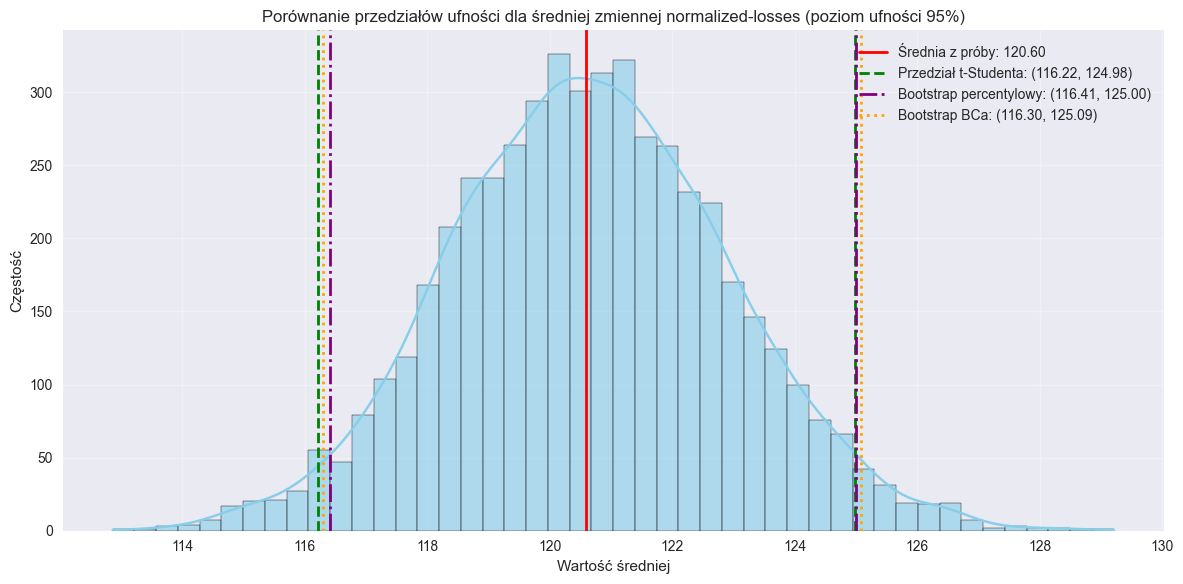

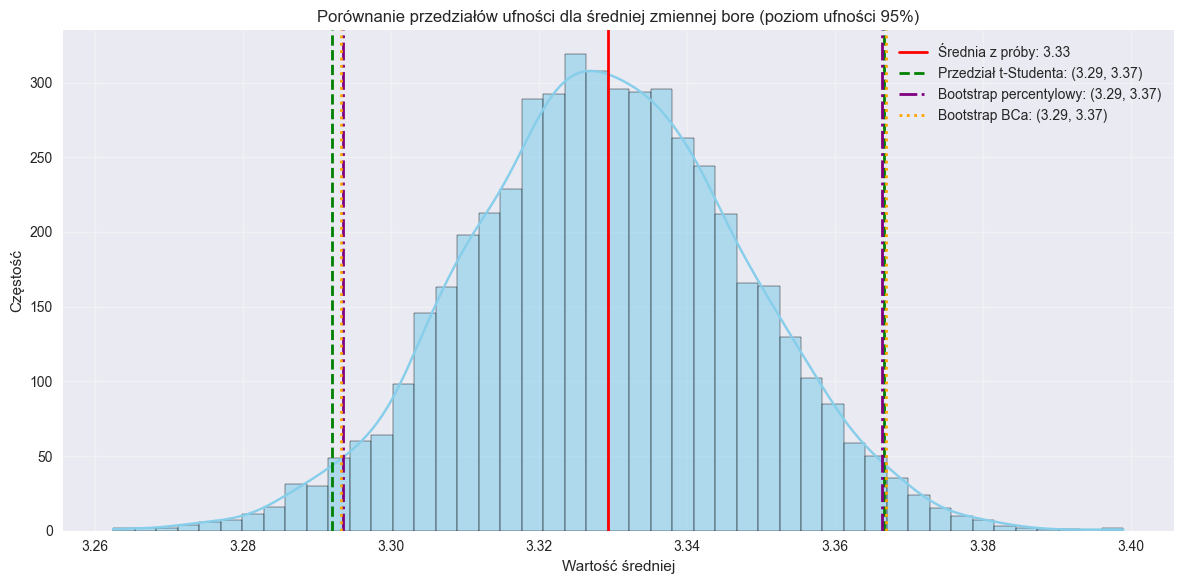

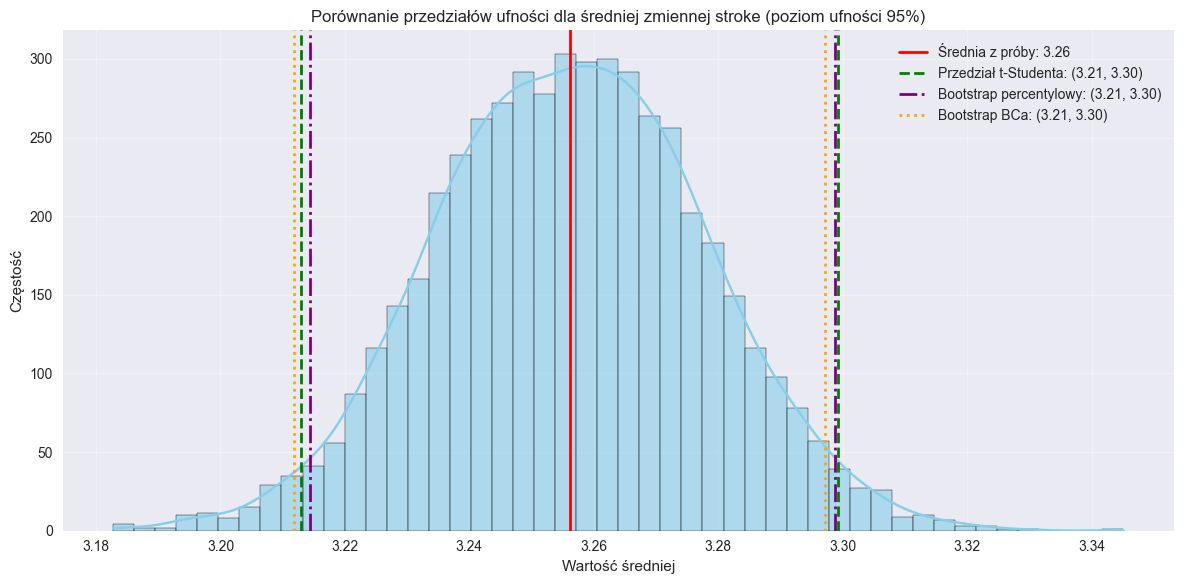

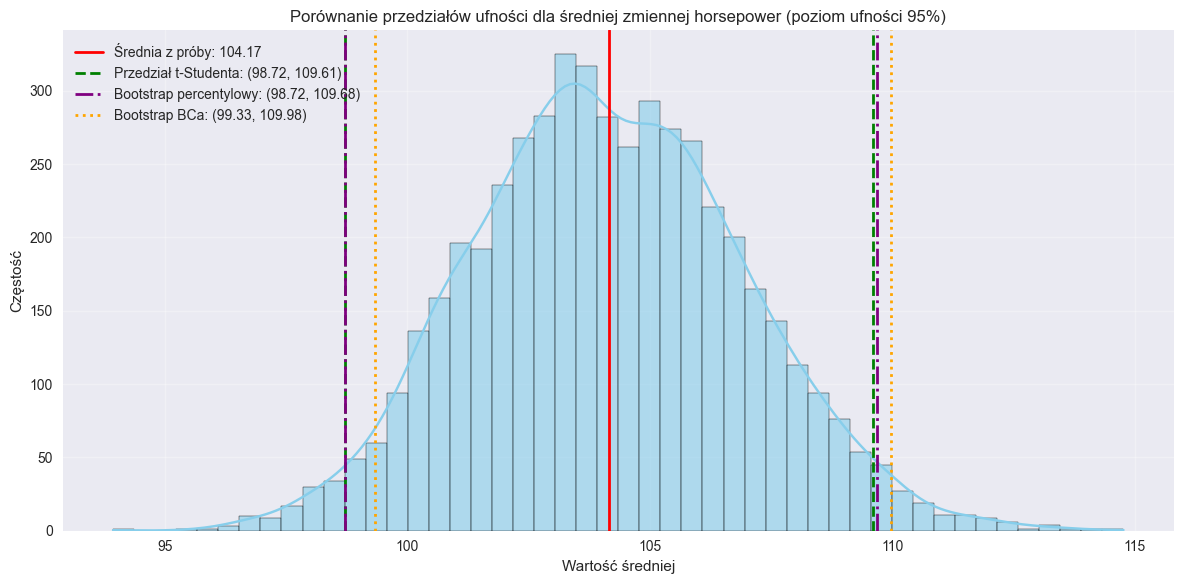

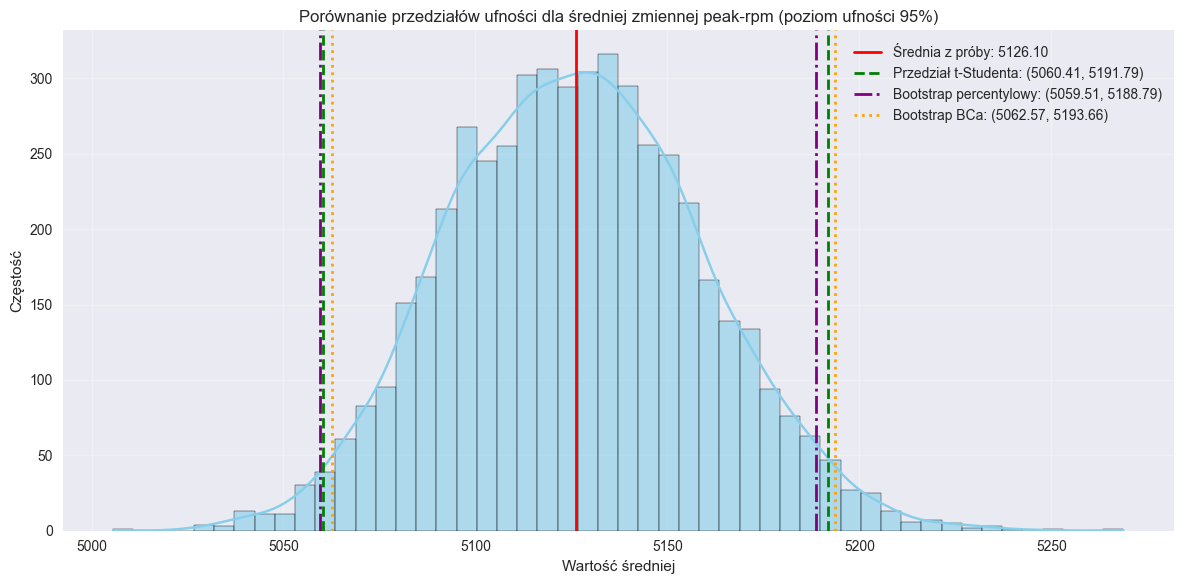

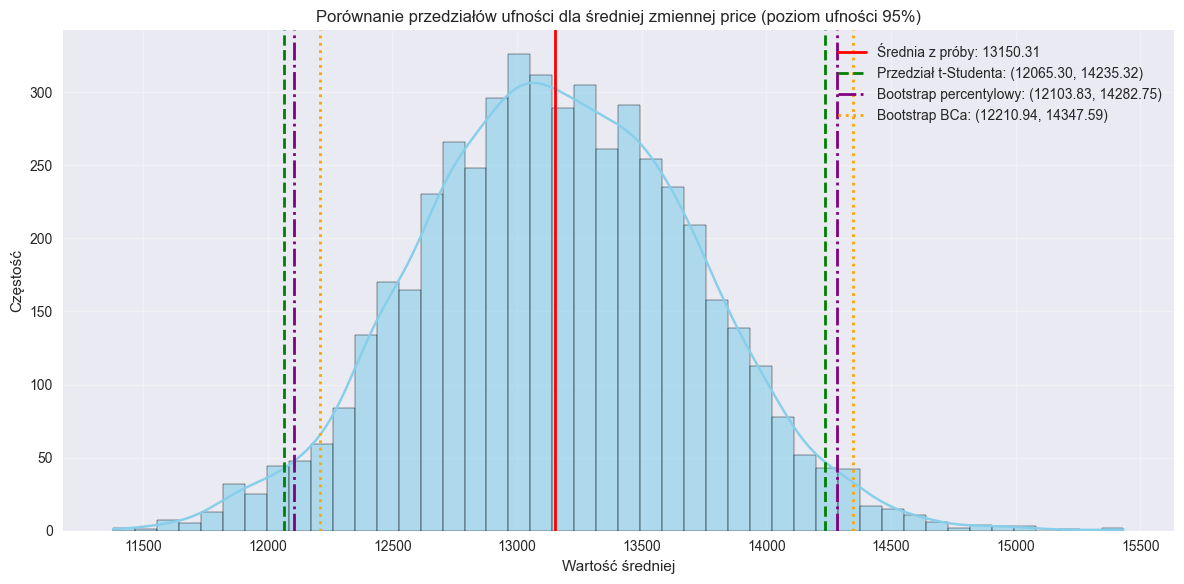

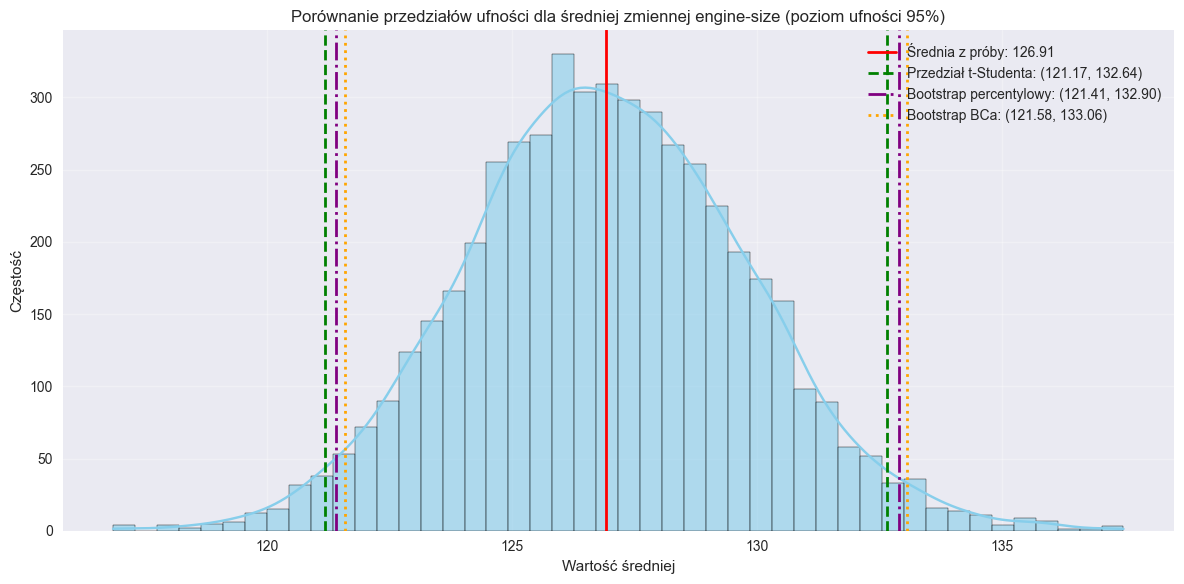

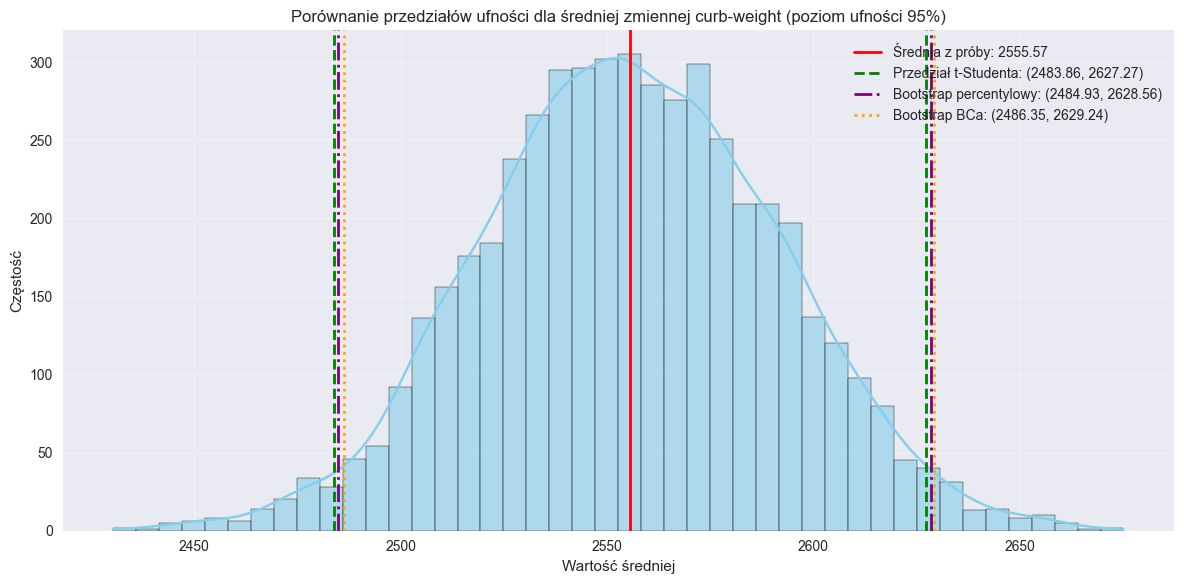

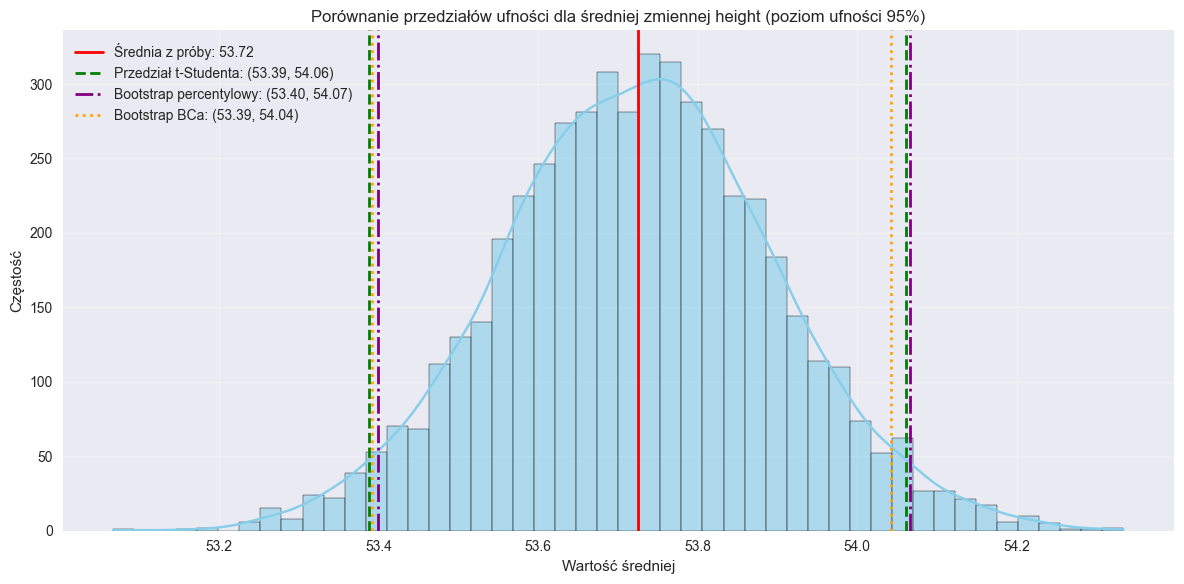

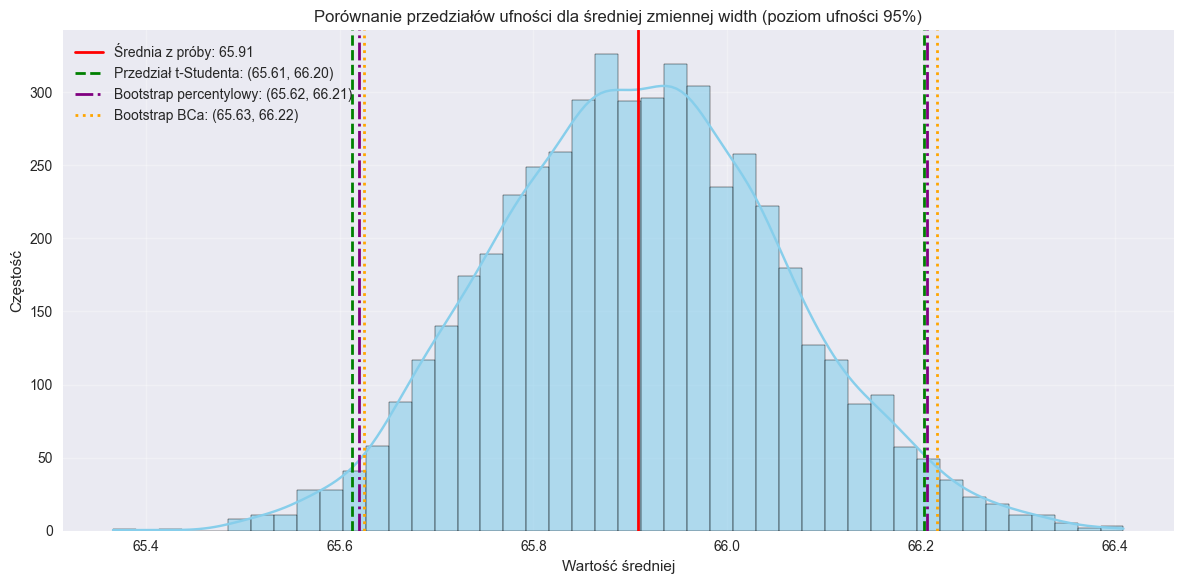

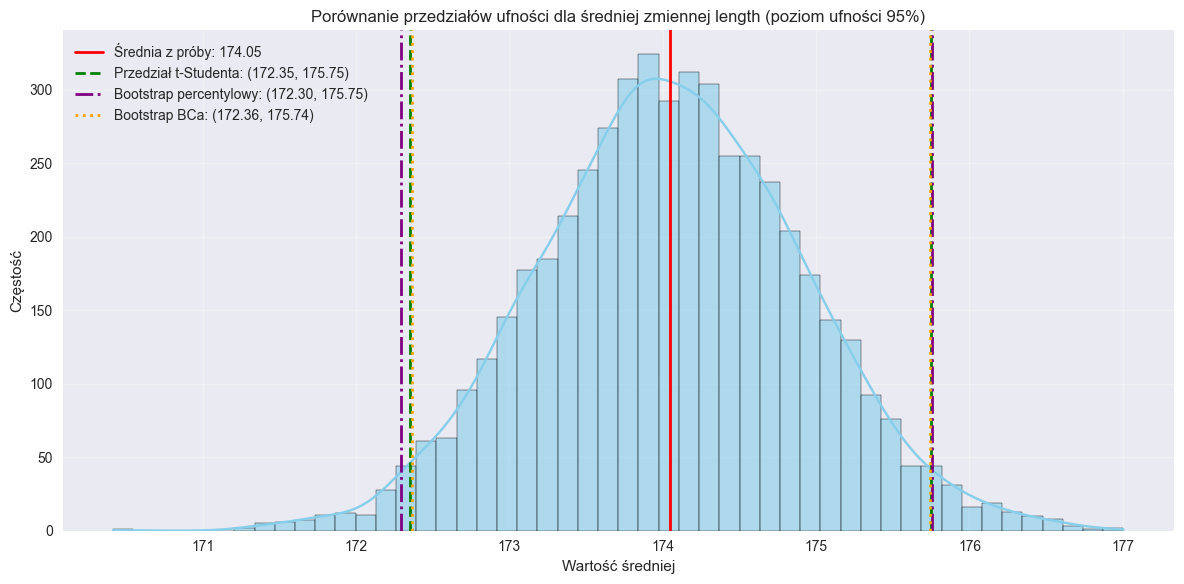

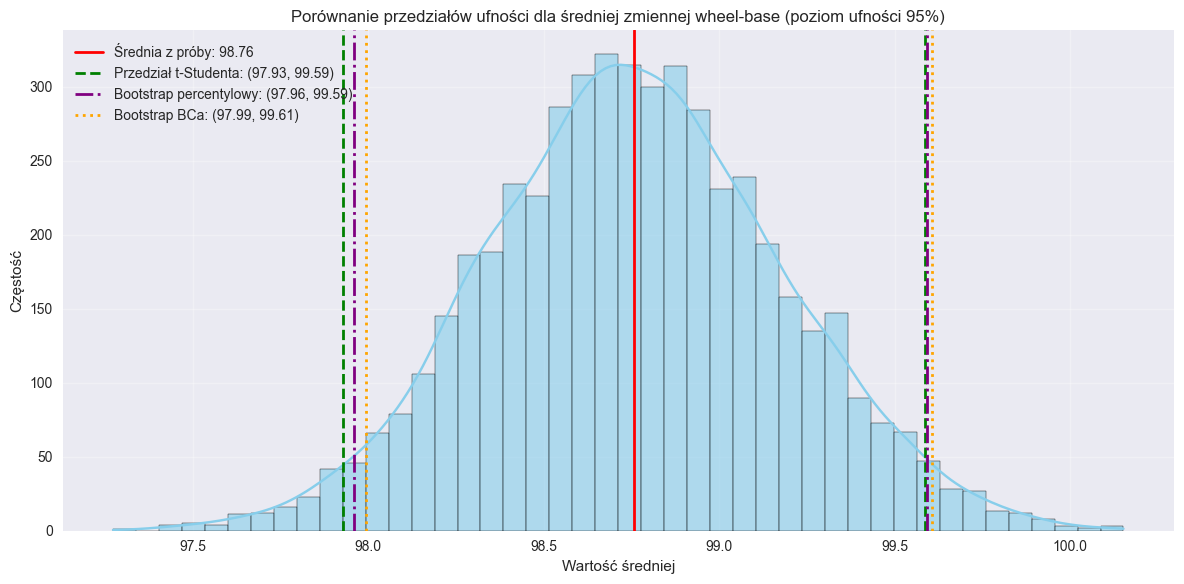

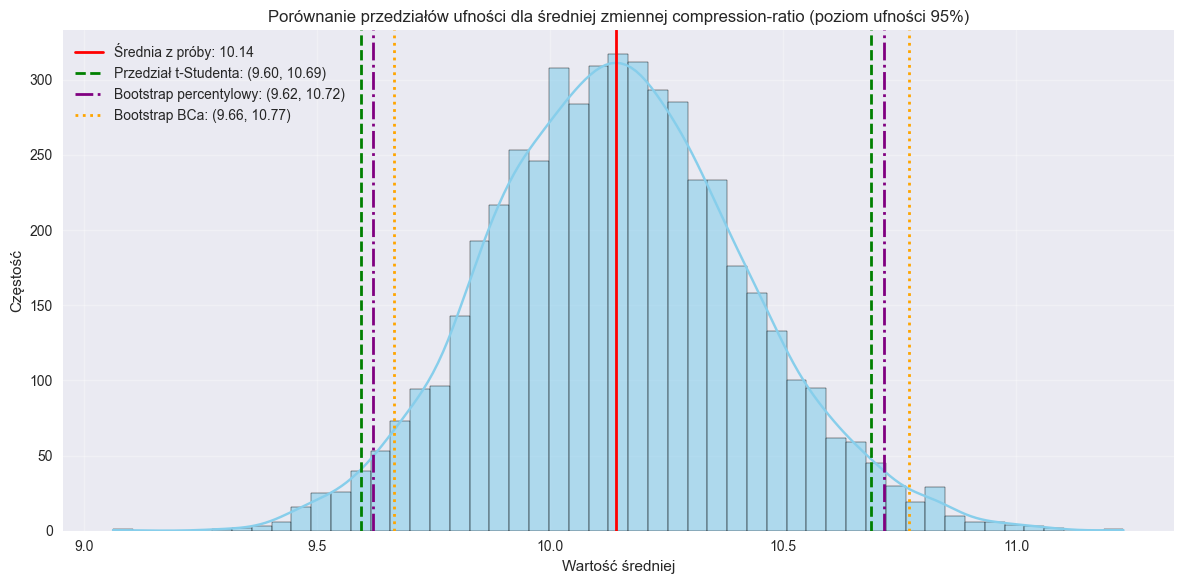

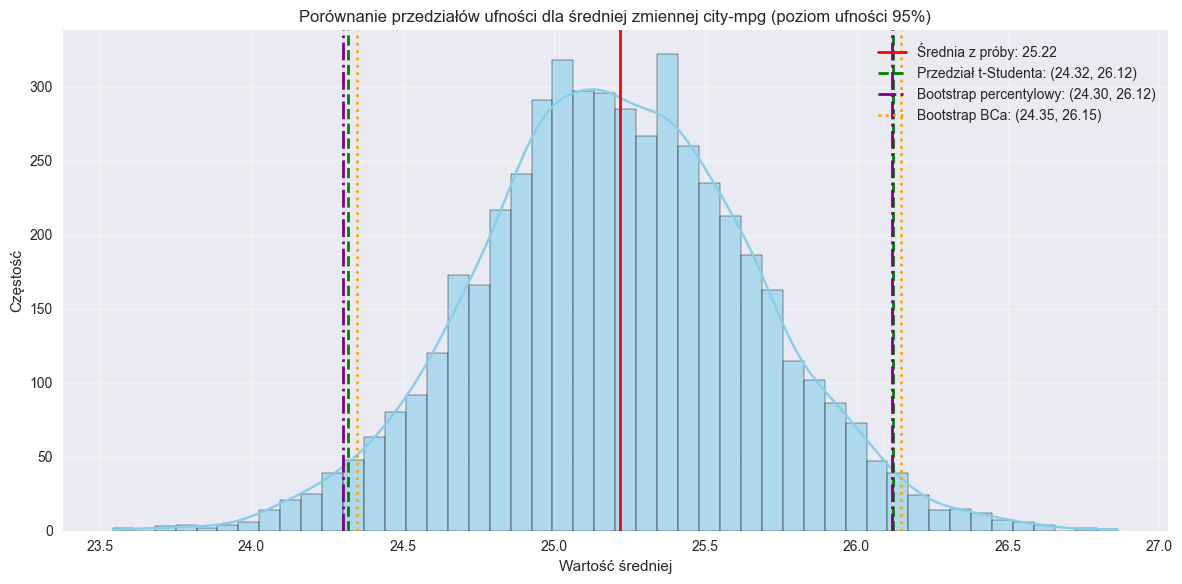

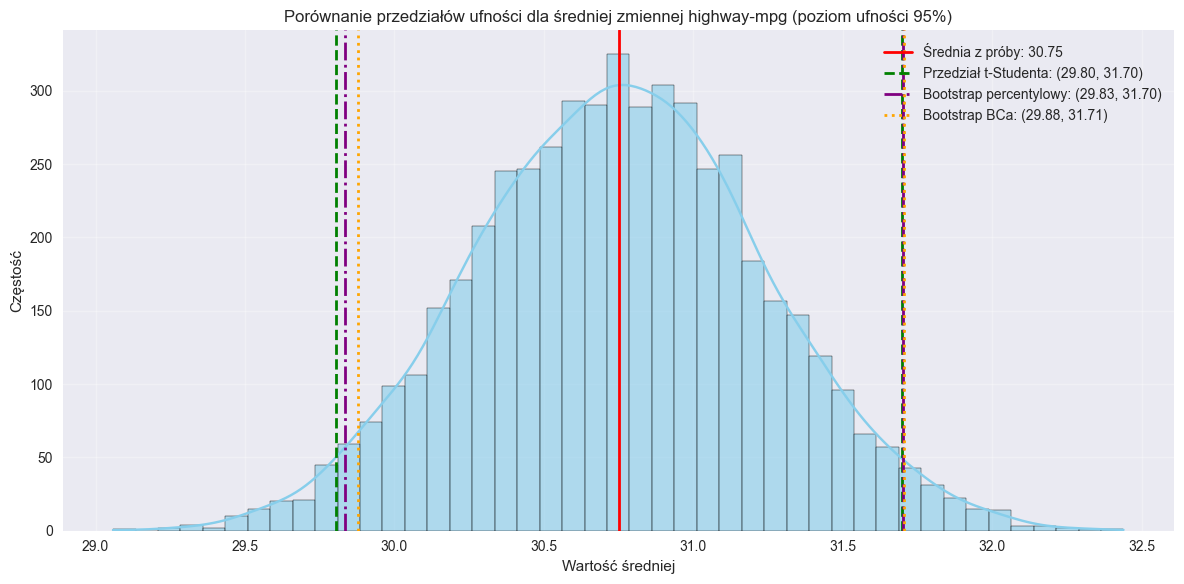

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

# Przetworzenie brakujących wartości w zmiennych ciągłych
for column in continuous_vars:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].fillna(df[column].median())

# Funkcje do obliczania przedziałów ufności parametrycznymi metodami
def mean_confidence_interval_t(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    t_critical = stats.t.ppf((1 + confidence) / 2, n-1)
    margin_of_error = t_critical * std_err
    return (mean - margin_of_error, mean + margin_of_error)

def variance_confidence_interval(data, confidence=0.95):
    n = len(data)
    var = np.var(data, ddof=1)
    chi2_lower = stats.chi2.ppf((1 - confidence) / 2, n-1)
    chi2_upper = stats.chi2.ppf((1 + confidence) / 2, n-1)
    var_lower = (n-1) * var / chi2_upper
    var_upper = (n-1) * var / chi2_lower
    return (var_lower, var_upper)

# Funkcje do obliczania przedziałów ufności metodą bootstrap
def bootstrap_confidence_interval(data, n_bootstrap=5000, confidence=0.95):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = resample(data, replace=True, n_samples=len(data))
        bootstrap_means.append(np.mean(bootstrap_sample))
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    return np.percentile(bootstrap_means, [lower_percentile, upper_percentile])

def bootstrap_bca_interval(data, statistic=np.mean, n_bootstrap=5000, confidence=0.95):
    theta_hat = statistic(data)
    bootstrap_replicates = []
    for _ in range(n_bootstrap):
        bootstrap_sample = resample(data, replace=True, n_samples=len(data))
        bootstrap_replicates.append(statistic(bootstrap_sample))
    
    prop_less_than_theta_hat = np.mean([1 if t < theta_hat else 0 for t in bootstrap_replicates])
    z0 = stats.norm.ppf(prop_less_than_theta_hat)
    
    jackknife_replicates = []
    for i in range(len(data)):
        jack_sample = np.delete(data, i)
        jackknife_replicates.append(statistic(jack_sample))
    
    jack_mean = np.mean(jackknife_replicates)
    num = np.sum([(jack_mean - jt)**3 for jt in jackknife_replicates])
    den = 6.0 * np.sum([(jack_mean - jt)**2 for jt in jackknife_replicates])**1.5
    
    if abs(den) < 1e-10:
        a = 0
    else:
        a = num / den
    
    alpha = (1 - confidence) / 2
    z_alpha = stats.norm.ppf(alpha)
    z_1_minus_alpha = stats.norm.ppf(1 - alpha)
    
    p_lower = stats.norm.cdf(z0 + (z0 + z_alpha) / (1 - a * (z0 + z_alpha)))
    p_upper = stats.norm.cdf(z0 + (z0 + z_1_minus_alpha) / (1 - a * (z0 + z_1_minus_alpha)))
    
    lower_percentile = 100 * p_lower
    upper_percentile = 100 * p_upper
    
    return np.percentile(bootstrap_replicates, [lower_percentile, upper_percentile])

# Tworzenie tabeli porównawczej przedziałów ufności
def create_confidence_intervals_table(df, variables, confidence=0.95):
    results = []
    
    for var in variables:
        data = df[var].values
        mean = np.mean(data)
        var_val = np.var(data, ddof=1)
        
        # Przedziały ufności dla średniej
        t_interval = mean_confidence_interval_t(data, confidence)
        bootstrap_interval = bootstrap_confidence_interval(data, 5000, confidence)
        bca_interval = bootstrap_bca_interval(data, np.mean, 5000, confidence)
        
        # Przedział ufności dla wariancji
        var_interval = variance_confidence_interval(data, confidence)
        
        result = {
            'Zmienna': var,
            'Średnia': mean,
            'CI_t_dolny': t_interval[0],
            'CI_t_górny': t_interval[1],
            'CI_bootstrap_dolny': bootstrap_interval[0],
            'CI_bootstrap_górny': bootstrap_interval[1],
            'CI_bootstrap_bca_dolny': bca_interval[0],
            'CI_bootstrap_bca_górny': bca_interval[1],
            'Wariancja': var_val,
            'CI_var_dolny': var_interval[0],
            'CI_var_górny': var_interval[1],
        }
        results.append(result)
    
    return pd.DataFrame(results)

# Wizualizacja porównania przedziałów ufności
def visualize_confidence_intervals_comparison(df, var_name, confidence=0.95):
    data = df[var_name].values
    
    # Obliczanie przedziałów ufności
    t_interval = mean_confidence_interval_t(data, confidence)
    bootstrap_interval = bootstrap_confidence_interval(data, 5000, confidence)
    bca_interval = bootstrap_bca_interval(data, np.mean, 5000, confidence)
    
    # Generowanie rozkładu bootstrapowego
    bootstrap_means = []
    for _ in range(5000):
        bootstrap_sample = resample(data, replace=True, n_samples=len(data))
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    # Wizualizacja
    plt.figure(figsize=(12, 6))
    
    # Histogram wartości bootstrapowych
    sns.histplot(bootstrap_means, kde=True, color='skyblue', alpha=0.6)
    
    # Średnia z próby
    plt.axvline(np.mean(data), color='red', linestyle='-', linewidth=2, 
                label=f'Średnia z próby: {np.mean(data):.2f}')
    
    # Przedziały ufności
    plt.axvline(t_interval[0], color='green', linestyle='--', linewidth=2, 
                label=f'Przedział t-Studenta: ({t_interval[0]:.2f}, {t_interval[1]:.2f})')
    plt.axvline(t_interval[1], color='green', linestyle='--', linewidth=2)
    
    plt.axvline(bootstrap_interval[0], color='purple', linestyle='-.', linewidth=2, 
                label=f'Bootstrap percentylowy: ({bootstrap_interval[0]:.2f}, {bootstrap_interval[1]:.2f})')
    plt.axvline(bootstrap_interval[1], color='purple', linestyle='-.', linewidth=2)
    
    plt.axvline(bca_interval[0], color='orange', linestyle=':', linewidth=2, 
                label=f'Bootstrap BCa: ({bca_interval[0]:.2f}, {bca_interval[1]:.2f})')
    plt.axvline(bca_interval[1], color='orange', linestyle=':', linewidth=2)
    
    plt.title(f'Porównanie przedziałów ufności dla średniej zmiennej {var_name} (poziom ufności {confidence*100:.0f}%)')
    plt.xlabel('Wartość średniej')
    plt.ylabel('Częstość')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Obliczanie i wyświetlanie wyników
confidence_level = 0.95

# Tworzenie tabeli z przedziałami ufności
ci_table = create_confidence_intervals_table(df, continuous_vars, confidence_level)

# Wyświetlanie tabeli z przedziałami ufności
print(f"\n--- Przedziały ufności dla zmiennych ciągłych (poziom ufności {confidence_level*100:.0f}%) ---")
display(ci_table.round(2).style.background_gradient(cmap='coolwarm', subset=['Średnia', 'Wariancja']))

# Wizualizacja porównania przedziałów ufności dla wybranych zmiennych
for var in continuous_vars:
    visualize_confidence_intervals_comparison(df, var, confidence_level)

# Zadanie 4
### Różne wykresy (im więcej tym lepiej). Powinny być histogramy, wykresy kwantyl-kwantyl, boxplot i inne.


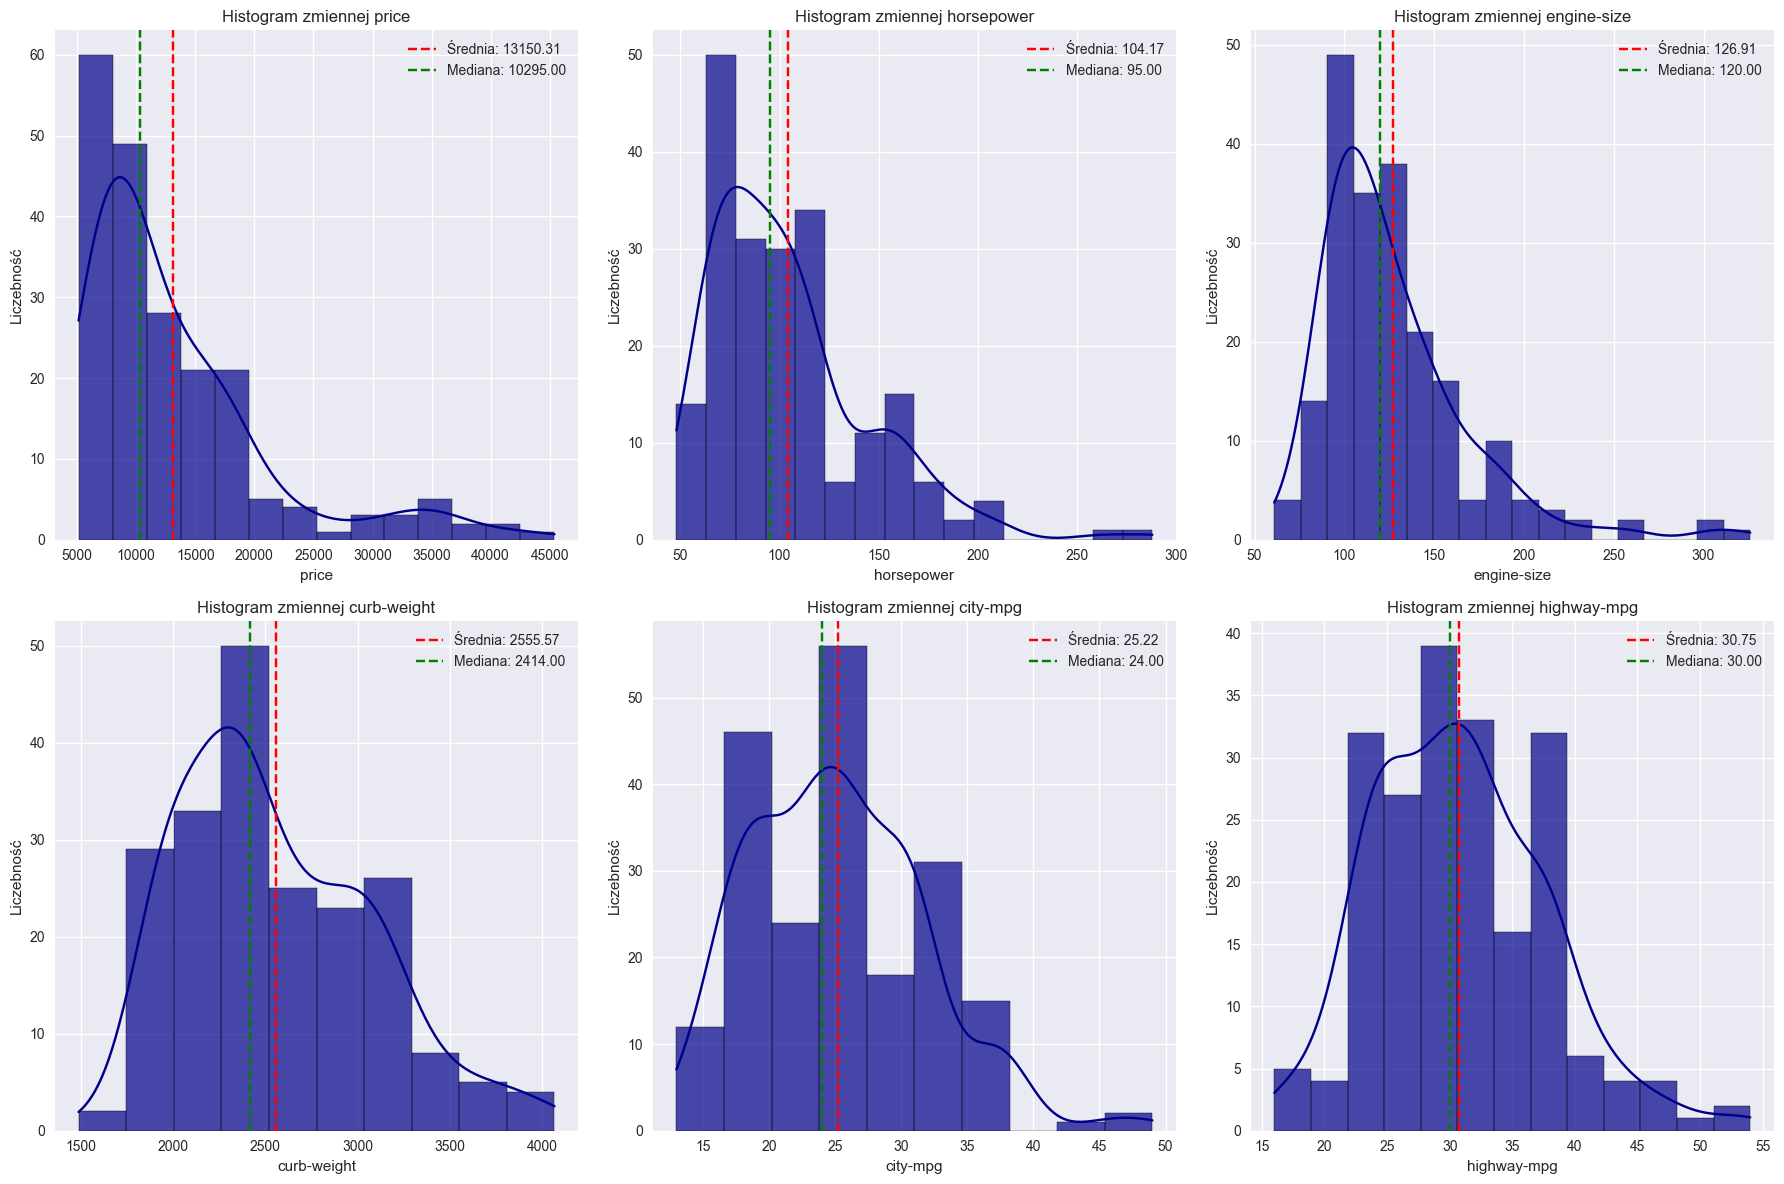

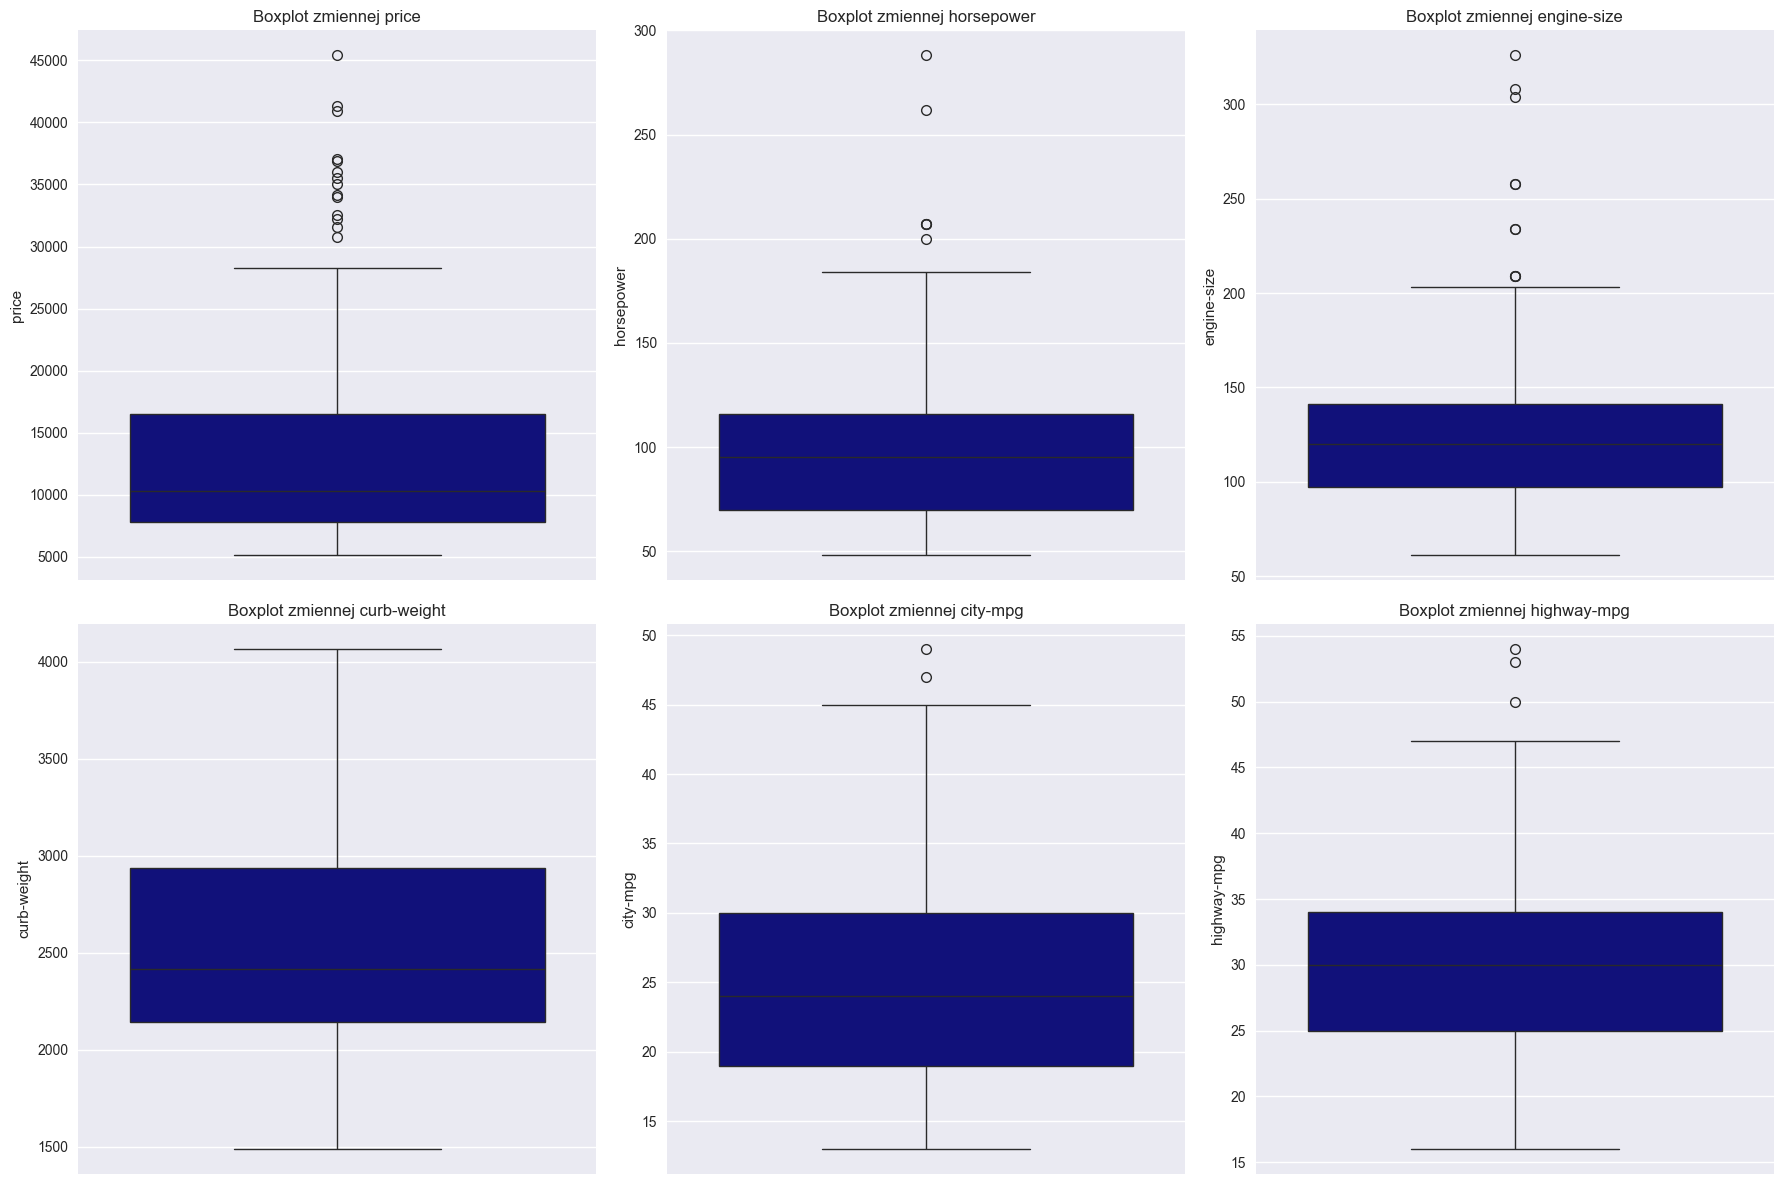

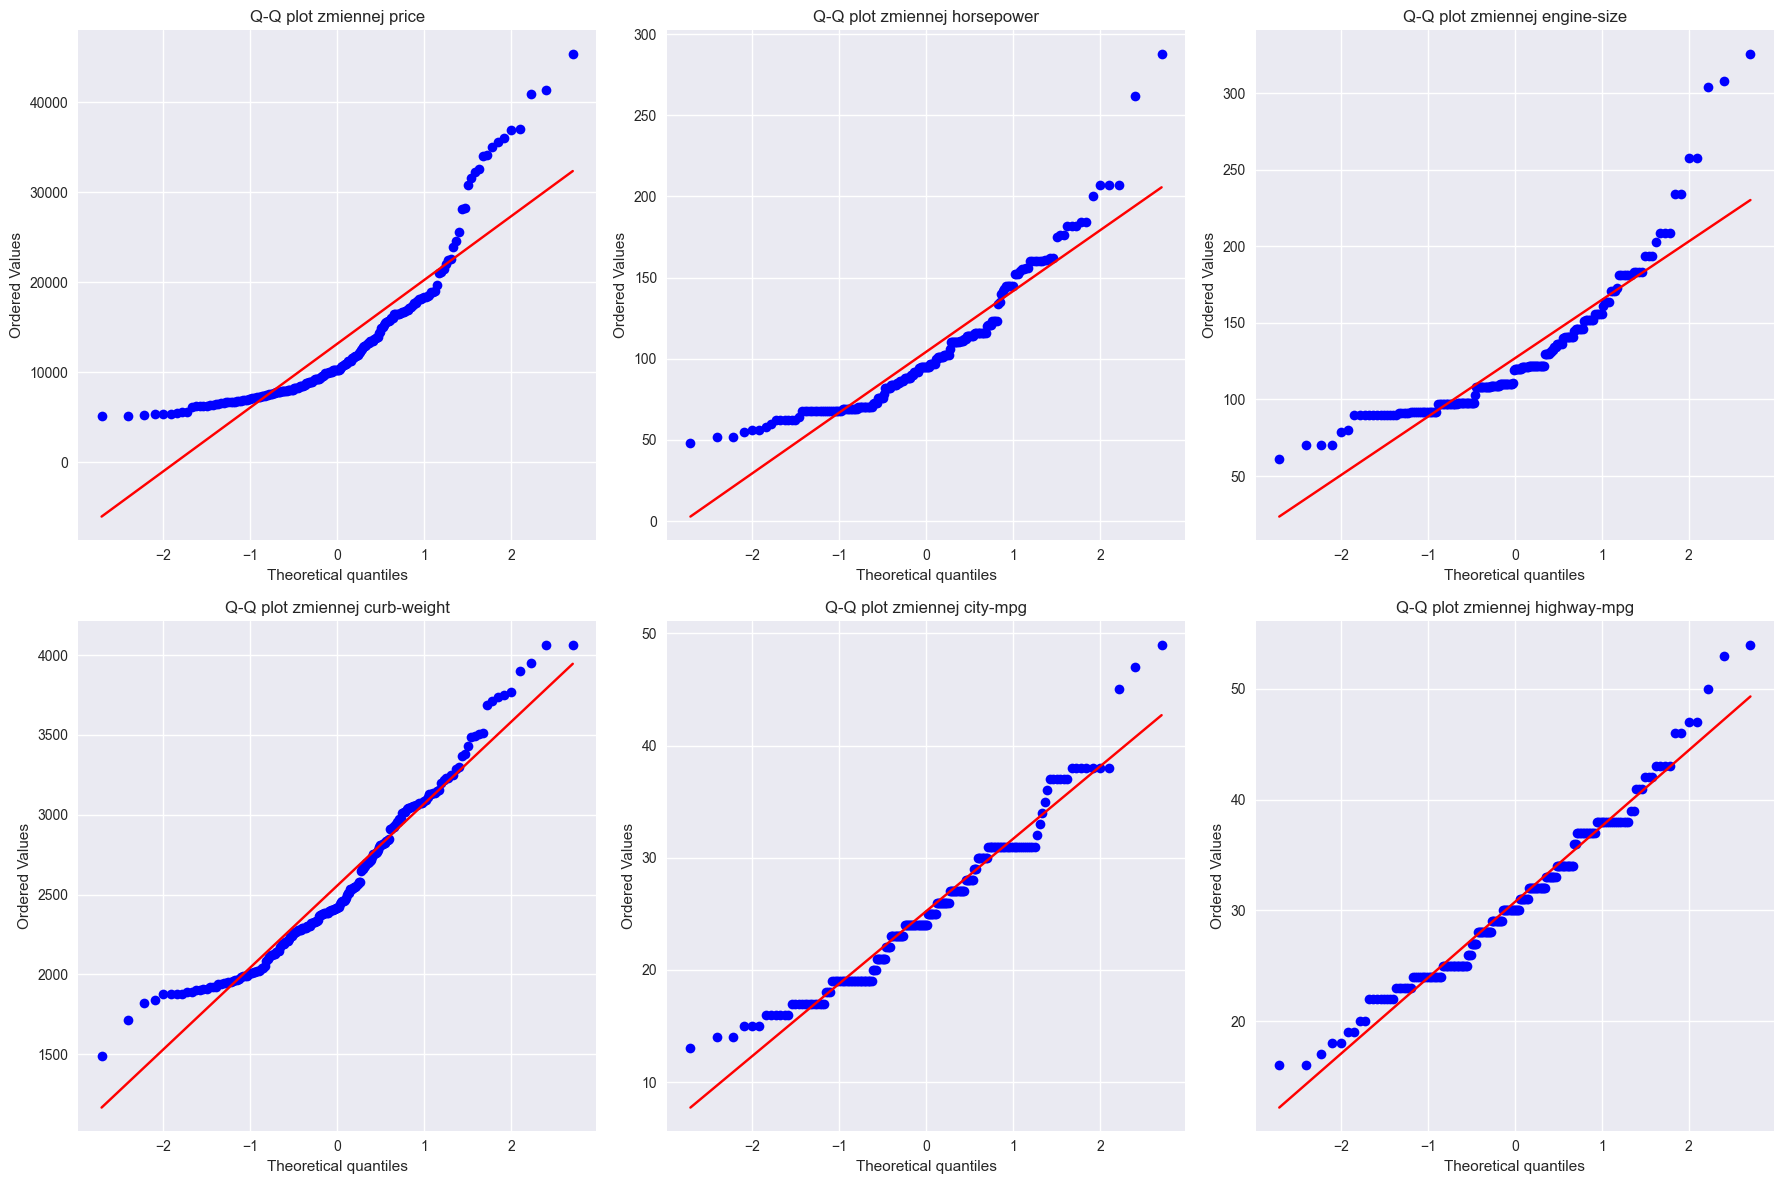

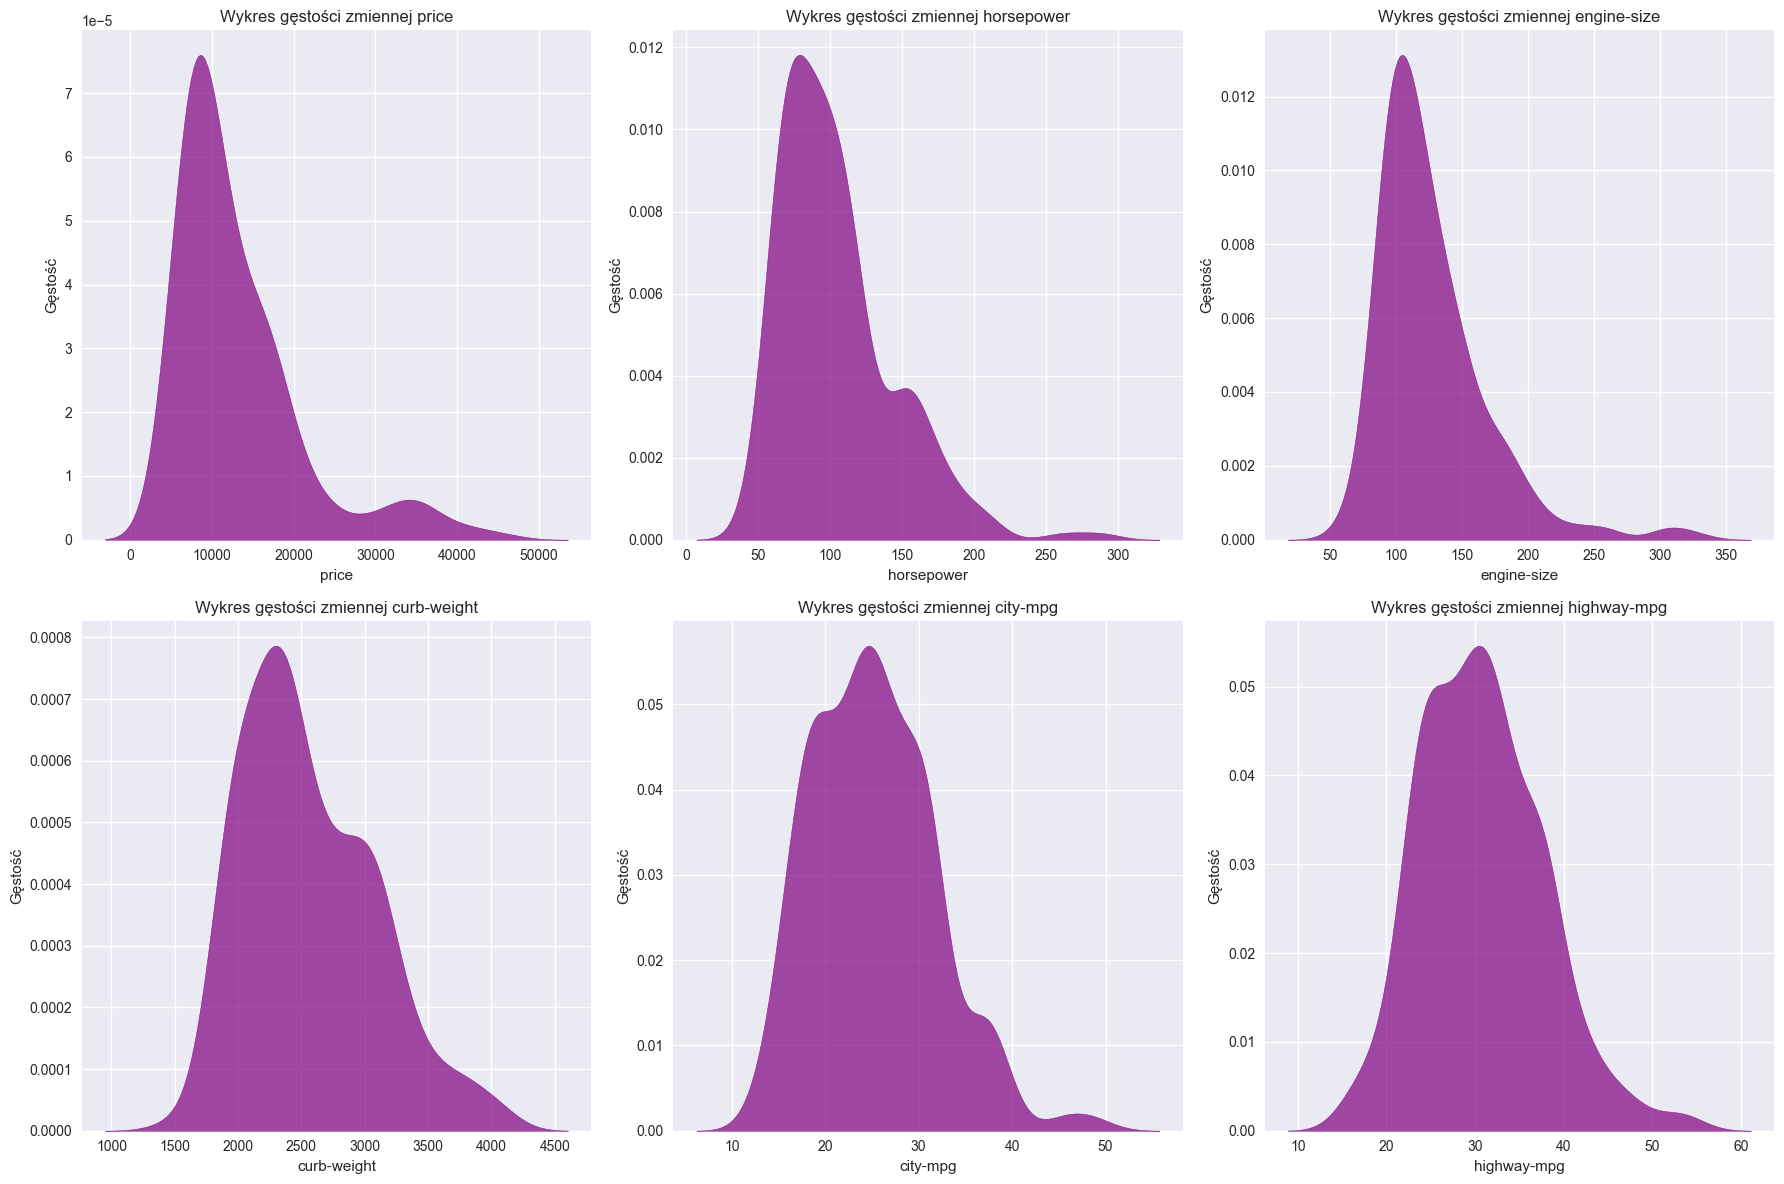

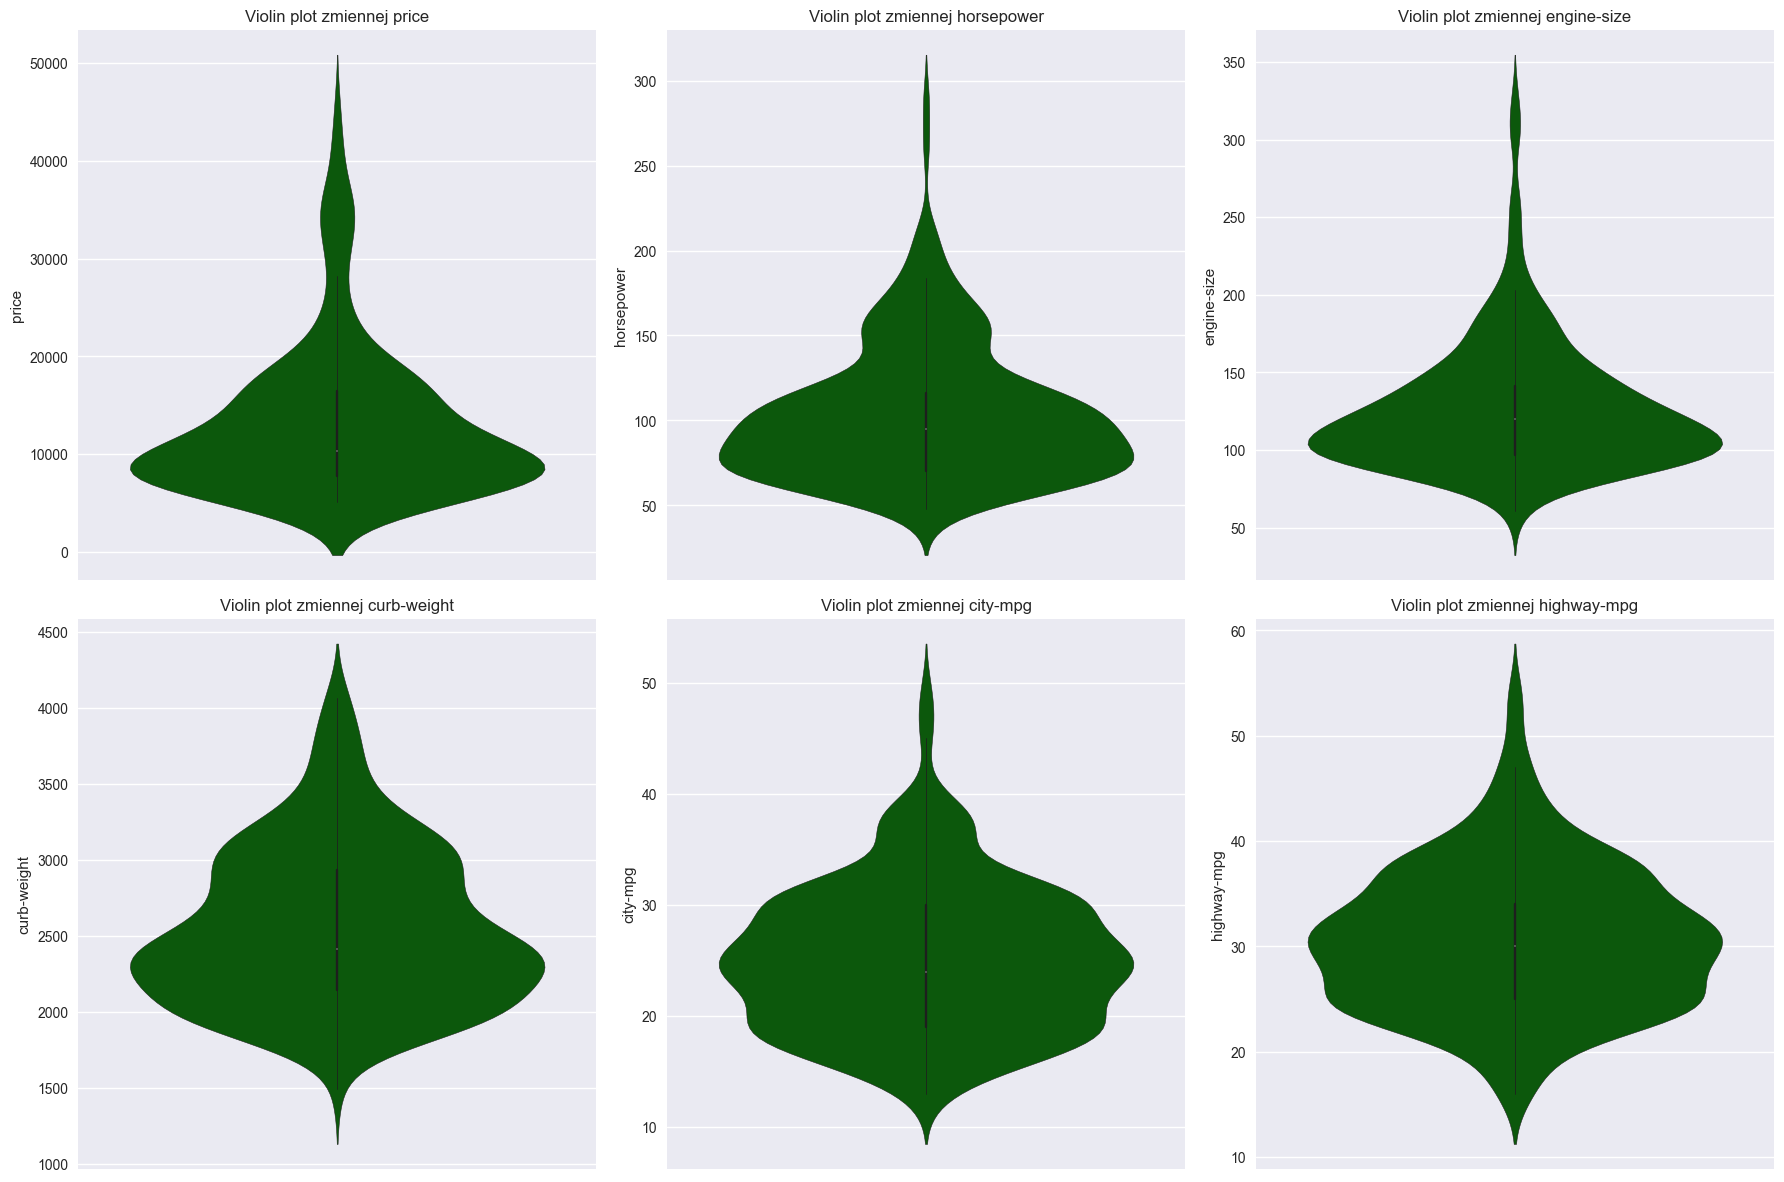

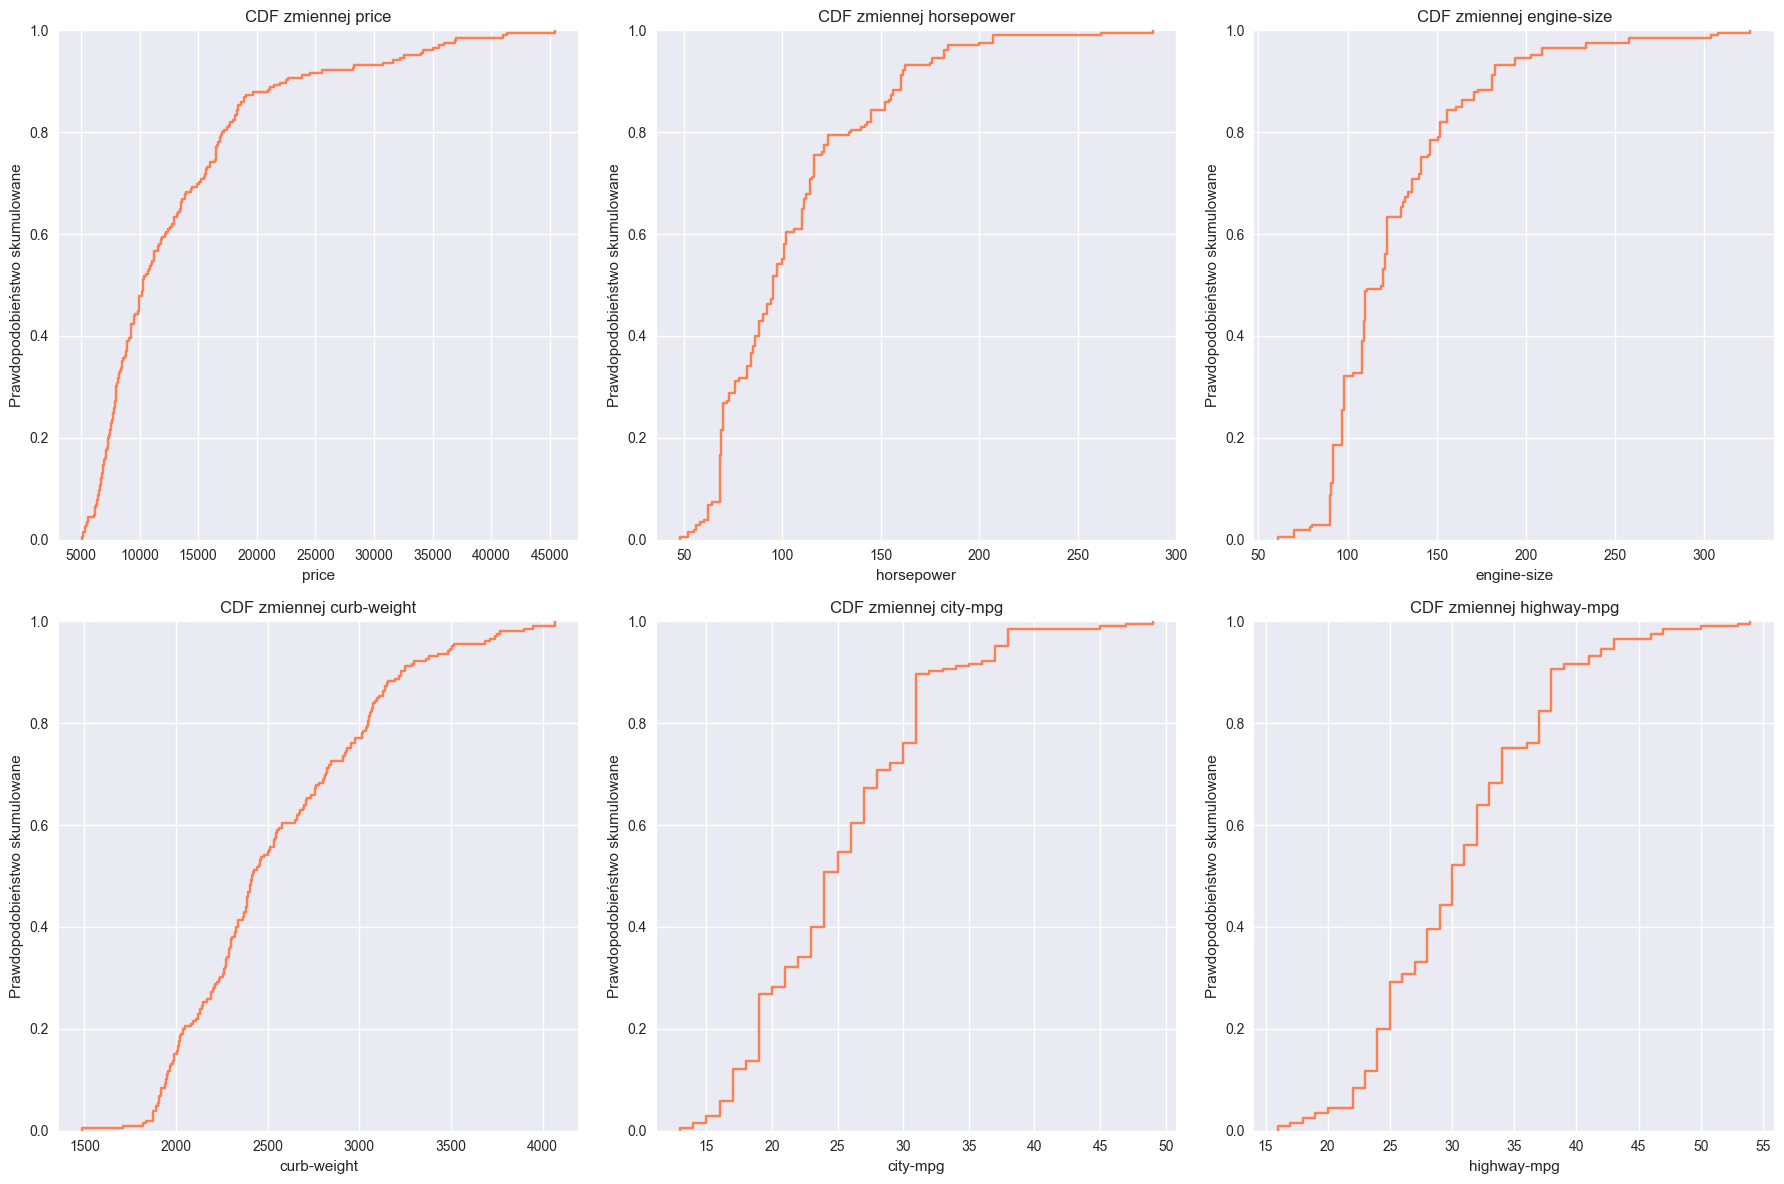

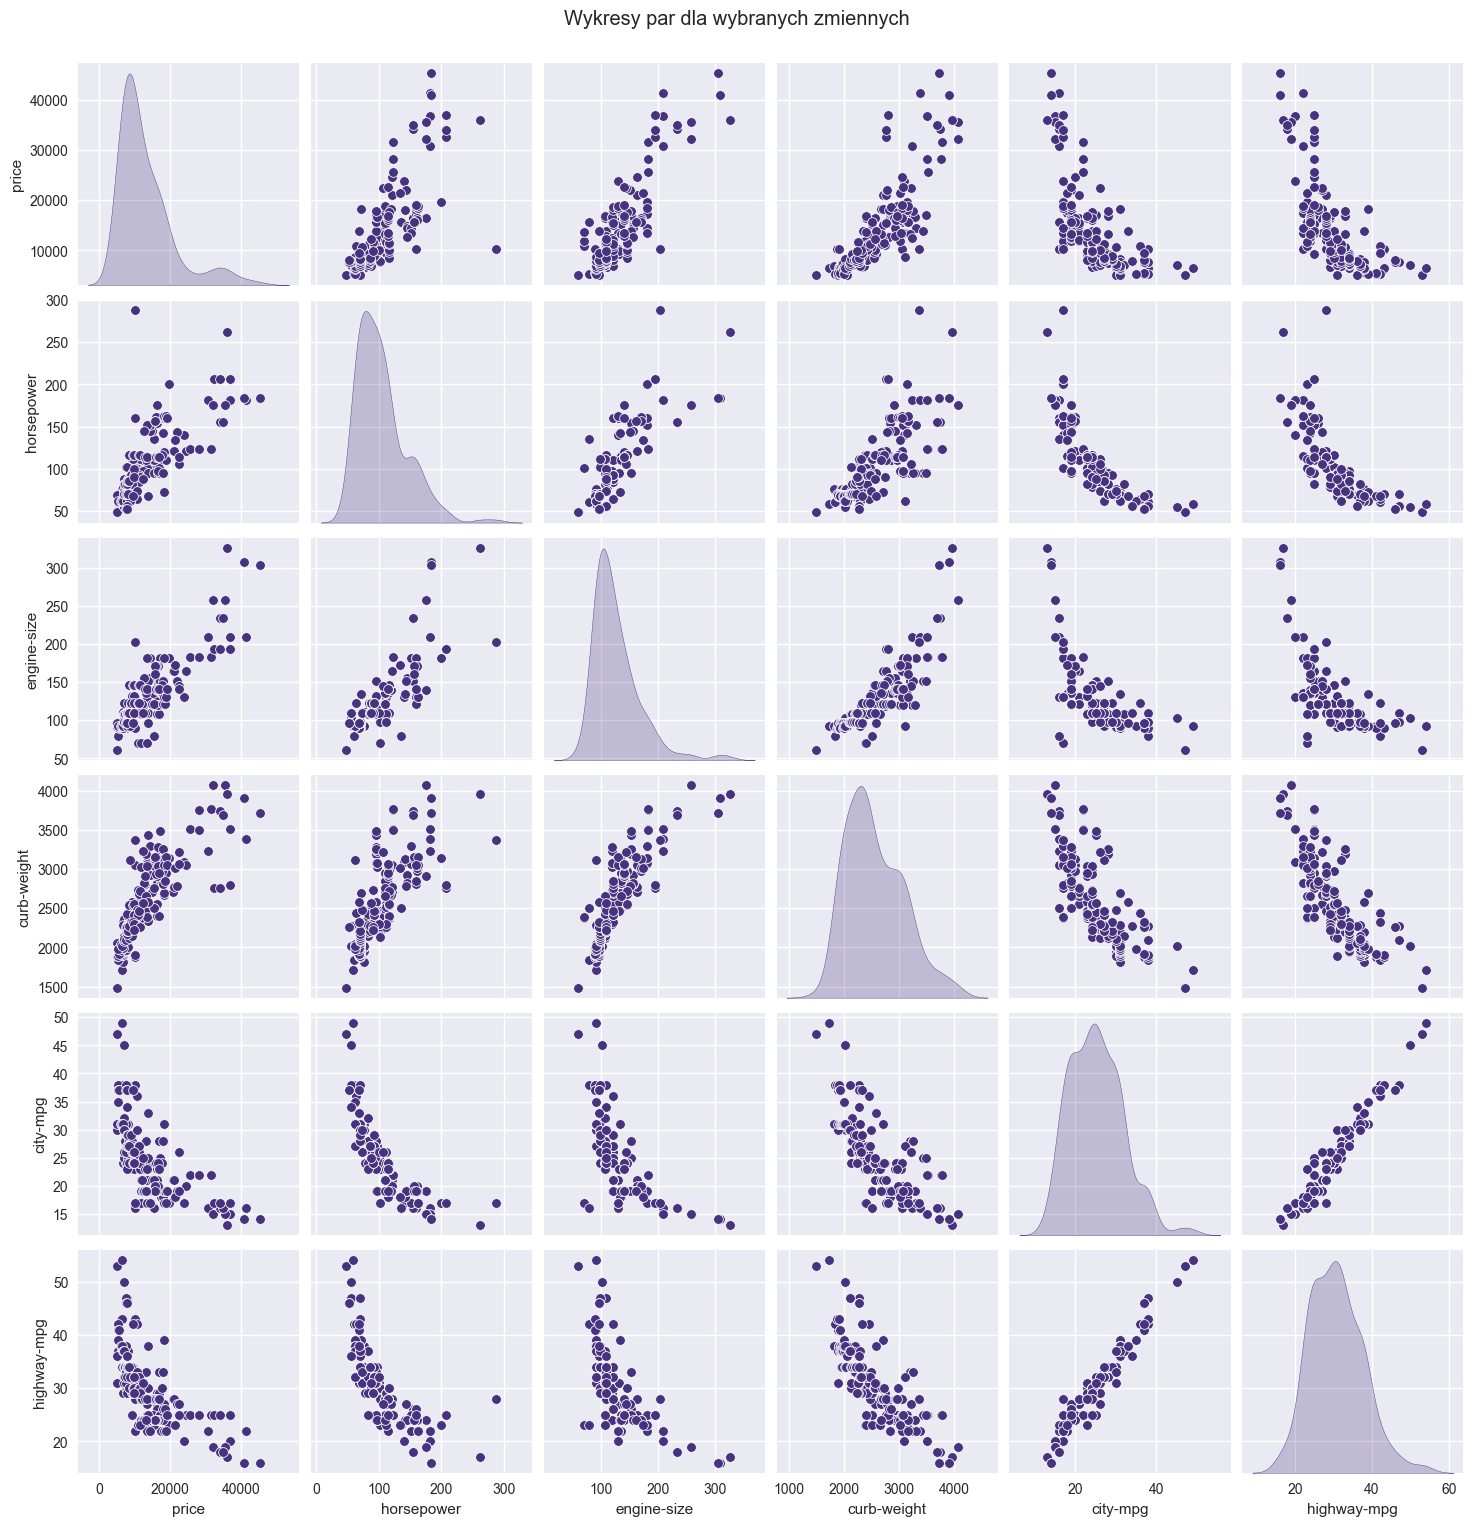

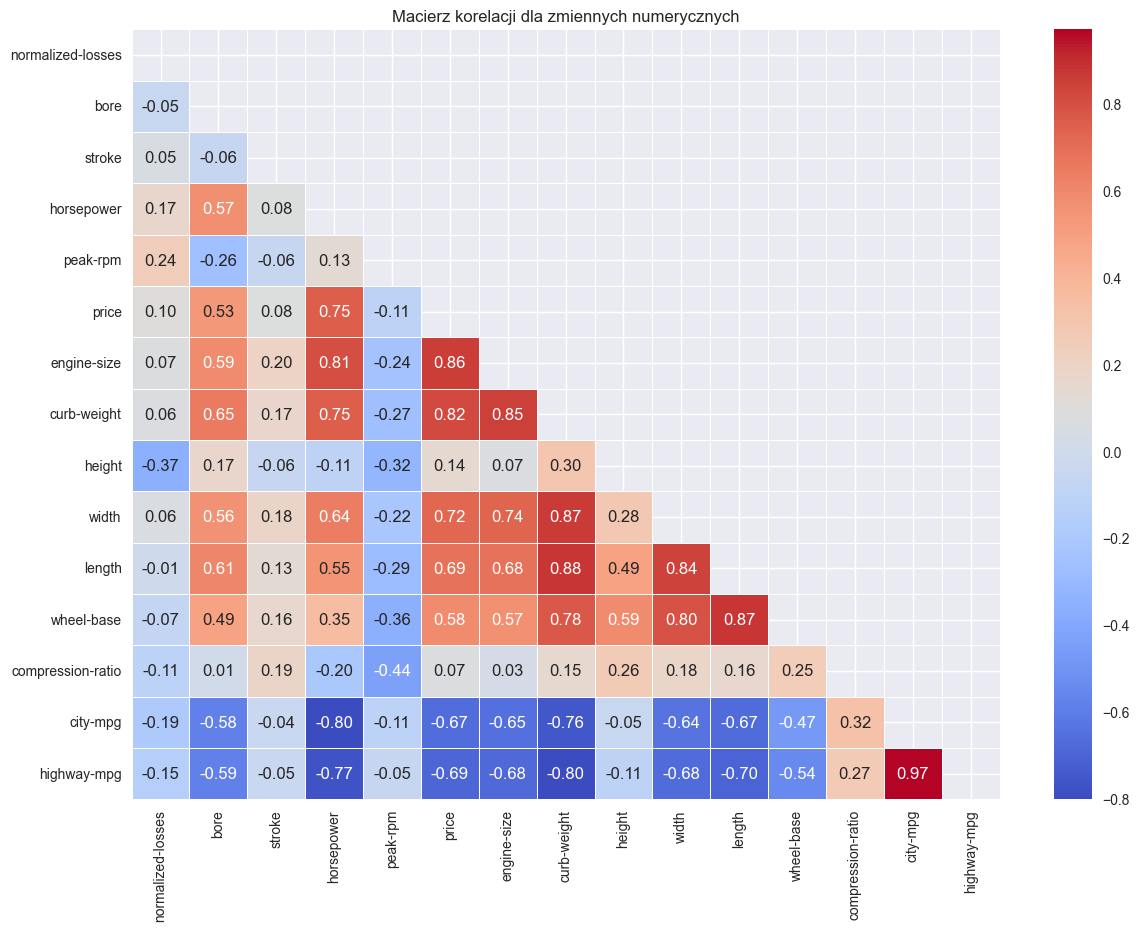

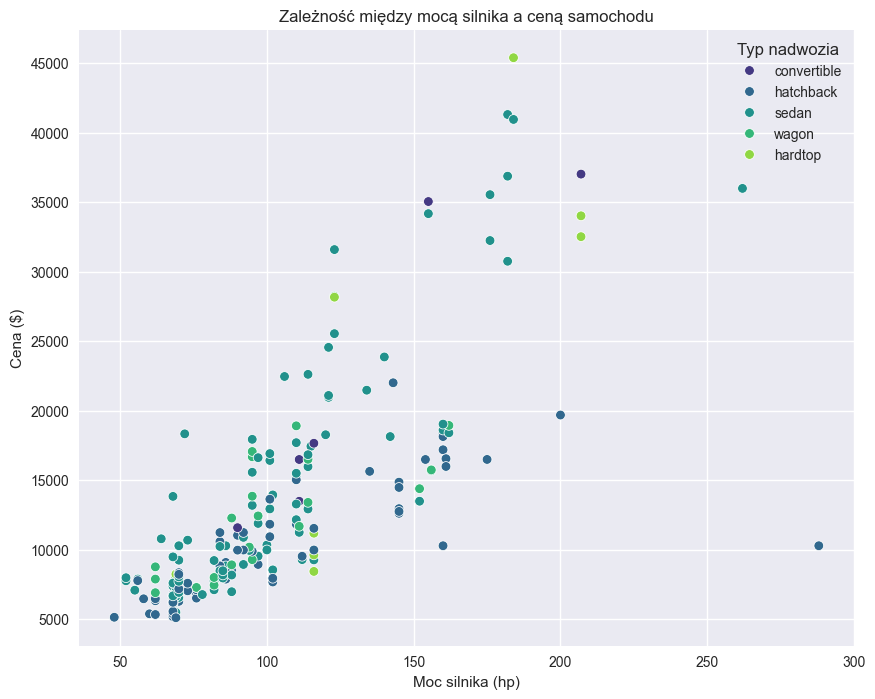

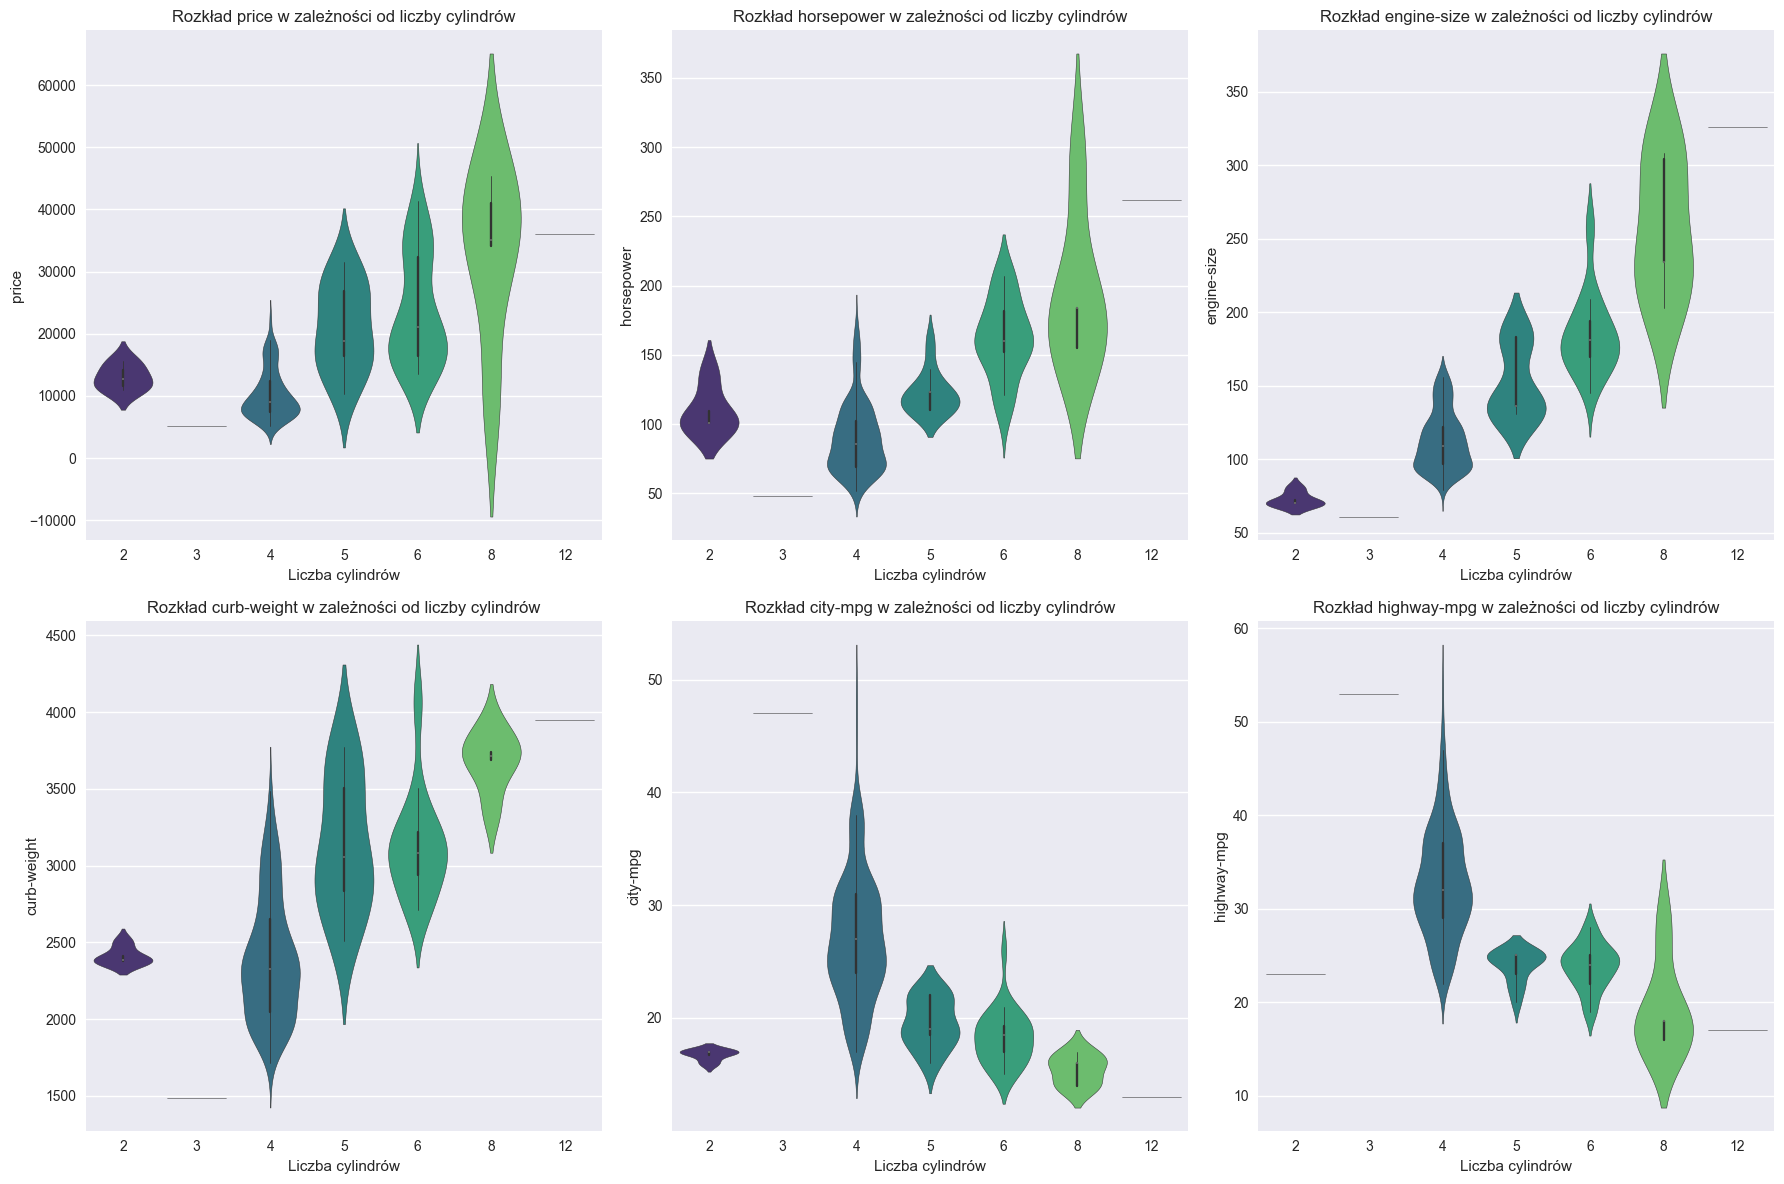

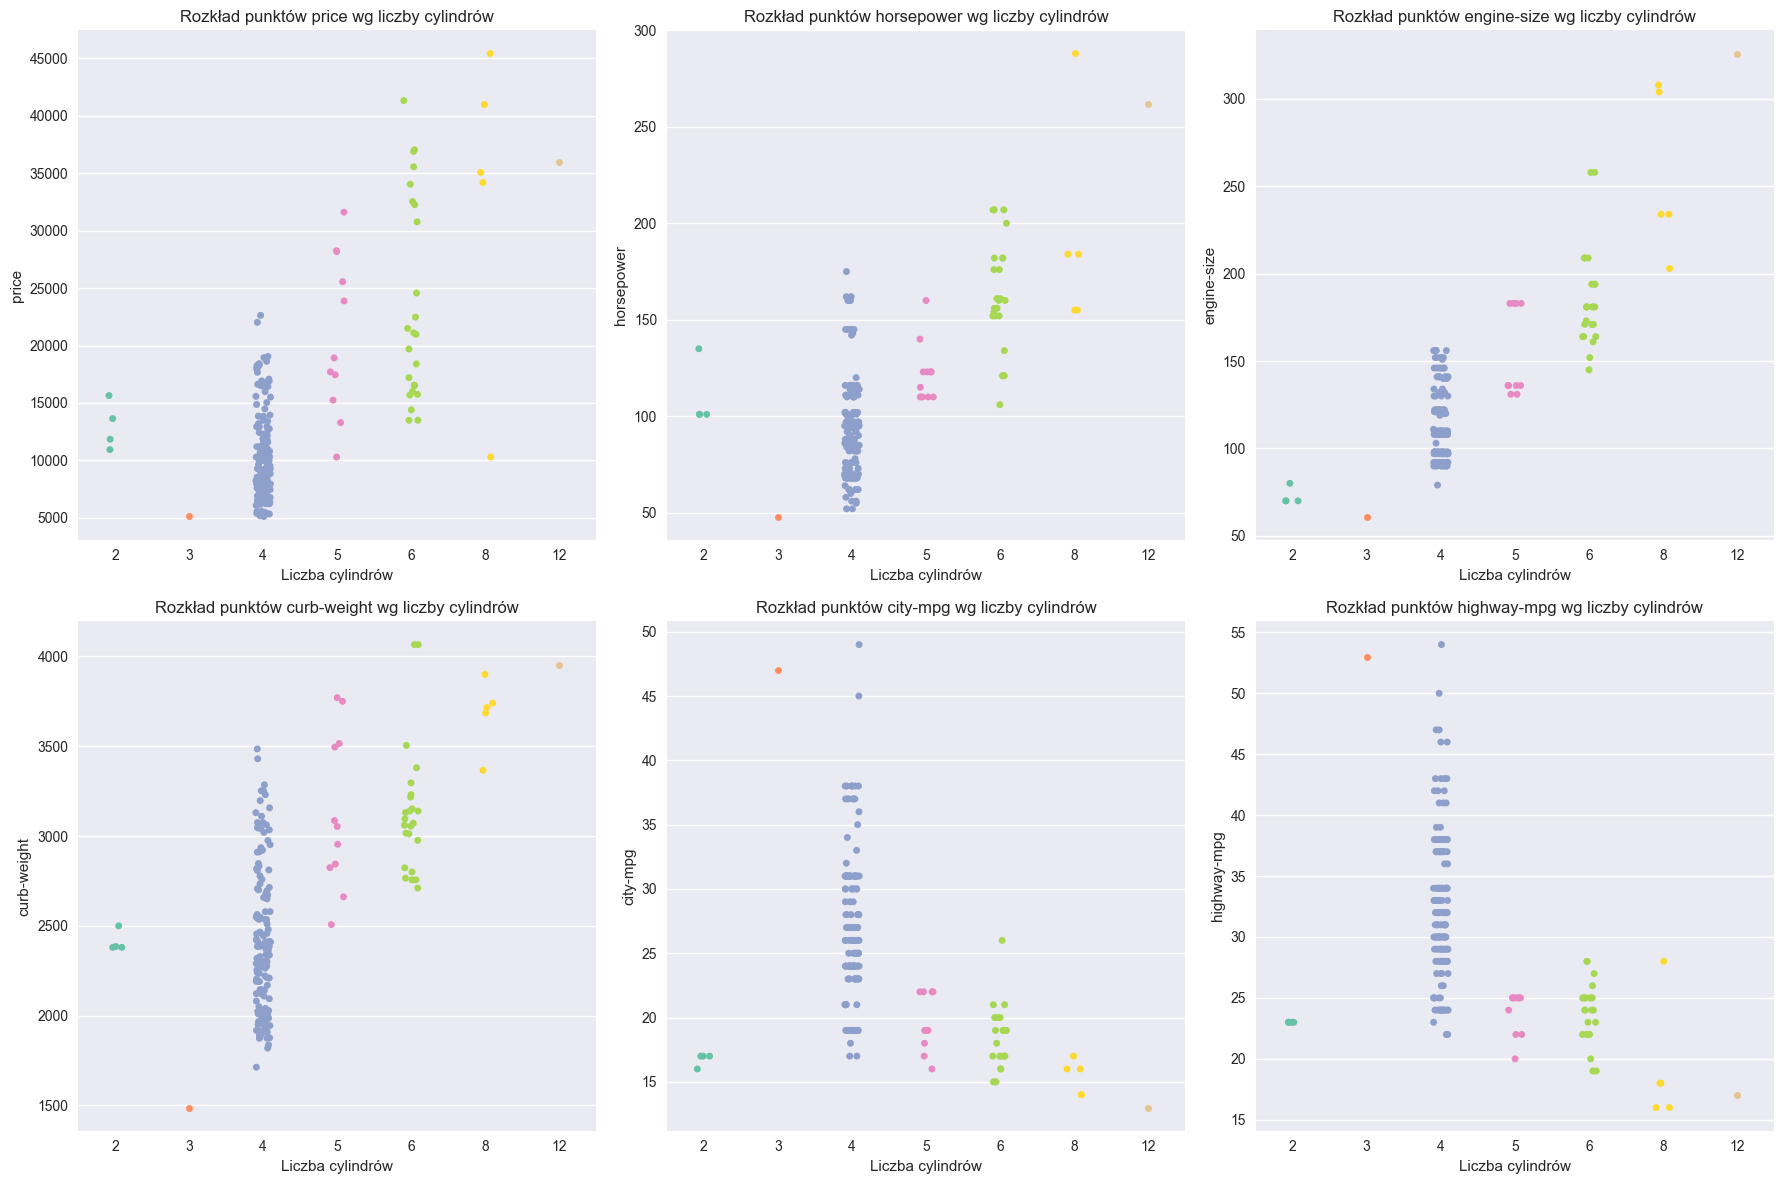

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import andrews_curves, parallel_coordinates

# Define selected_variables for plotting
selected_variables = ['price', 'horsepower', 'engine-size', 'curb-weight', 'city-mpg', 'highway-mpg']
numeric_cols = continuous_vars  # Use all continuous variables for correlation

# 1. HISTOGRAMS
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    sns.histplot(df[var], kde=True, ax=axes[i], color='darkblue', alpha=0.7)
    axes[i].set_title(f'Histogram zmiennej {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Liczebność')
    
    axes[i].axvline(df[var].mean(), color='red', linestyle='--', label=f'Średnia: {df[var].mean():.2f}')
    axes[i].axvline(df[var].median(), color='green', linestyle='--', label=f'Mediana: {df[var].median():.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# 2. BOXPLOTS
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    sns.boxplot(y=df[var], ax=axes[i], color='darkblue')
    axes[i].set_title(f'Boxplot zmiennej {var}')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

# 3. Q-Q PLOTS
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    stats.probplot(df[var], plot=axes[i])
    axes[i].set_title(f'Q-Q plot zmiennej {var}')

plt.tight_layout()
plt.show()

# 4. DENSITY PLOTS (KDE)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    sns.kdeplot(df[var], ax=axes[i], fill=True, color='purple', alpha=0.7)
    axes[i].set_title(f'Wykres gęstości zmiennej {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Gęstość')

plt.tight_layout()
plt.show()

# 5. VIOLIN PLOTS
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    sns.violinplot(y=df[var], ax=axes[i], color='darkgreen')
    axes[i].set_title(f'Violin plot zmiennej {var}')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

# 6. CUMULATIVE DISTRIBUTION PLOTS
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    sns.ecdfplot(df[var], ax=axes[i], color='coral')
    axes[i].set_title(f'CDF zmiennej {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Prawdopodobieństwo skumulowane')

plt.tight_layout()
plt.show()

# 7. SCATTER PLOTS MATRIX
sns.pairplot(df[selected_variables], diag_kind='kde', height=2.5)
plt.suptitle('Wykresy par dla wybranych zmiennych', y=1.02)
plt.show()

# 8. CORRELATION HEATMAP
plt.figure(figsize=(14, 10))
corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz korelacji dla zmiennych numerycznych')
plt.show()

# 9. SCATTER PLOT WITH CATEGORICAL VARIABLE
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='horsepower', y='price', hue='body-style', palette='viridis')
plt.title('Zależność między mocą silnika a ceną samochodu')
plt.xlabel('Moc silnika (hp)')
plt.ylabel('Cena ($)')
plt.legend(title='Typ nadwozia')
plt.show()

# 10. VIOLIN PLOTS BY CATEGORY
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    sns.violinplot(x='num-of-cylinders', y=var, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Rozkład {var} w zależności od liczby cylindrów')
    axes[i].set_xlabel('Liczba cylindrów')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

# 11. STRIP PLOTS (DISTRIBUTION OF POINTS)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    sns.stripplot(x='num-of-cylinders', y=var, data=df, ax=axes[i], palette='Set2', jitter=True)
    axes[i].set_title(f'Rozkład punktów {var} wg liczby cylindrów')
    axes[i].set_xlabel('Liczba cylindrów')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

# Zadanie 5
### Sprawdzenie czy rozkład (rozkłady) danych pochodzą z rozkładu normalnego.


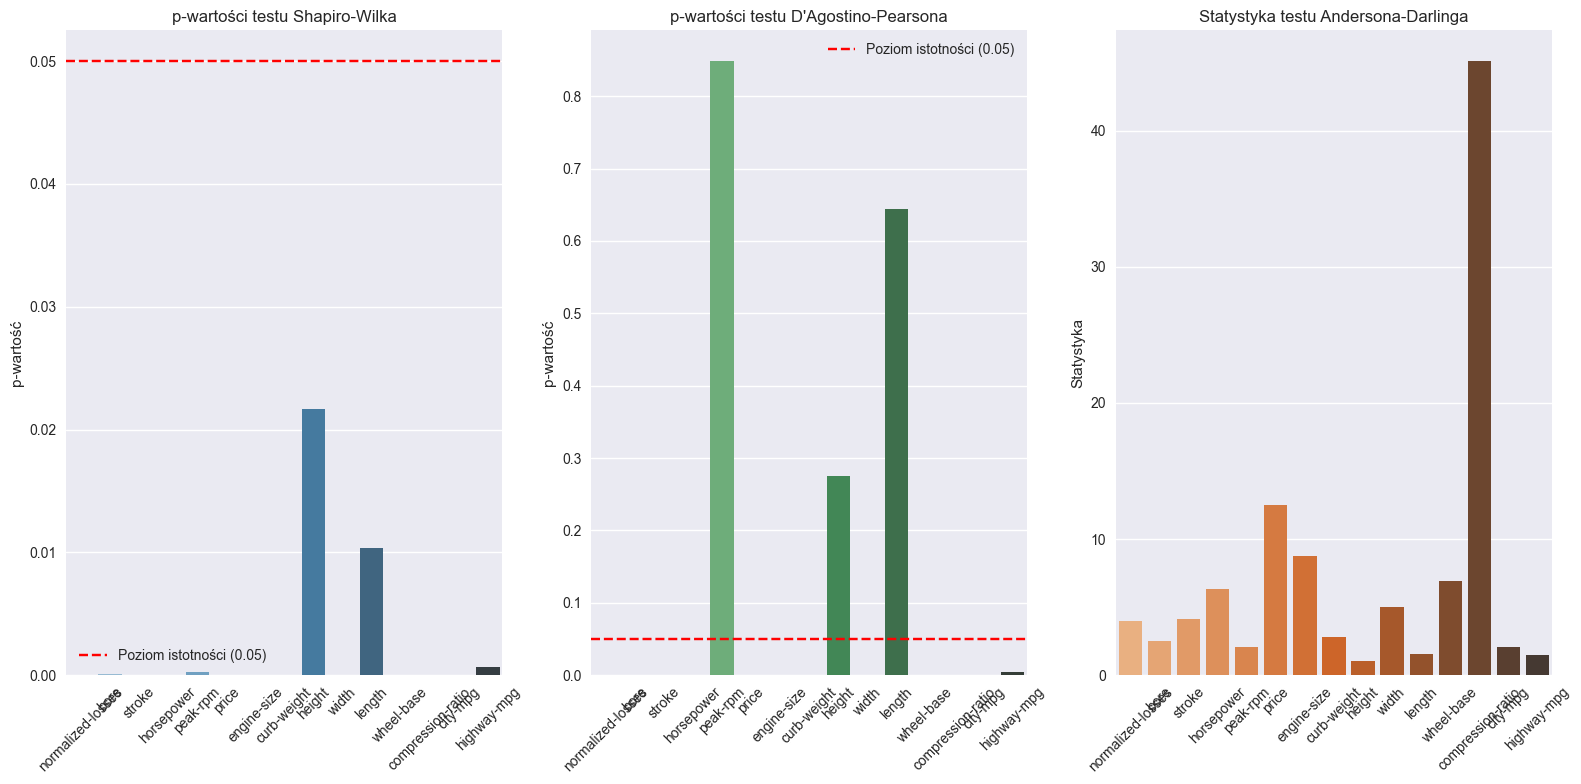

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

shapiro_p_values = []
dagostino_p_values = []
anderson_results = []

for var in continuous_vars:
    data = df[var].dropna()
    
    _, shapiro_p = stats.shapiro(data)
    shapiro_p_values.append(shapiro_p)
    
    _, dagostino_p = stats.normaltest(data)
    dagostino_p_values.append(dagostino_p)
    
    anderson_result = stats.anderson(data, dist='norm')
    anderson_results.append(anderson_result.statistic)

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
sns.barplot(x=continuous_vars, y=shapiro_p_values, palette="Blues_d")
plt.axhline(y=0.05, color='red', linestyle='--', label='Poziom istotności (0.05)')
plt.title('p-wartości testu Shapiro-Wilka')
plt.ylabel('p-wartość')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 3, 2)
sns.barplot(x=continuous_vars, y=dagostino_p_values, palette="Greens_d")
plt.axhline(y=0.05, color='red', linestyle='--', label='Poziom istotności (0.05)')
plt.title('p-wartości testu D\'Agostino-Pearsona')
plt.ylabel('p-wartość')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 3, 3)
sns.barplot(x=continuous_vars, y=anderson_results, palette="Oranges_d")
plt.title('Statystyka testu Andersona-Darlinga')
plt.ylabel('Statystyka')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Sprawdzenie czy rozkład danych pochodzi z rozkładu normalnego

Aby ocenić, czy zmienne numeryczne w zbiorze danych *Automobile* pochodzą z rozkładu normalnego, przeprowadzono trzy różne testy statystyczne:

- **Test Shapiro–Wilka**
- **Test D'Agostino–Pearsona**
- **Test Andersona–Darlinga**

Każdy z testów ocenia normalność rozkładu w nieco inny sposób, co pozwala na bardziej kompleksową analizę.

---

### Test Shapiro–Wilka

Wyniki testu przedstawione zostały na wykresie po lewej stronie. 

#### Wnioski:

- Dla żadnej z badanych zmiennych **p-wartość nie przekroczyła poziomu istotności 0.05**, co oznacza, że dla wszystkich zmiennych **odrzucamy hipotezę o normalności rozkładu**.
- Zmienna `curb-weight` osiągnęła najwyższą p-wartość (~0.023), jednak nadal poniżej progu istotności.

---

### Test D'Agostino–Pearsona

Ten test łączy informację o skośności i kurtozie w celu oceny normalności.

#### Wnioski:

- **Tylko dwie zmienne (`horsepower` i `width`) mają p-wartość wyraźnie przekraczającą 0.05**, co oznacza brak podstaw do odrzucenia hipotezy o normalności.
- Pozostałe zmienne nie spełniają założenia normalności, podobnie jak w teście Shapiro–Wilka.

---

### Test Andersona–Darlinga

Na ostatnim wykresie przedstawiono wartości statystyki testowej. Im wyższa wartość, tym większe odchylenie od rozkładu normalnego.

#### Wnioski:

- Zmienna `compression-ratio` wyróżnia się **najwyższą statystyką testu (~45)**, co wskazuje na **znaczne odstępstwo od rozkładu normalnego**.
- Najniższe wartości statystyki występują m.in. dla `height`, `curb-weight` i `engine-size`.

---

### Podsumowanie

Na podstawie przeprowadzonych testów można stwierdzić, że:

- **Większość zmiennych w zbiorze danych nie pochodzi z rozkładu normalnego**.
- Tylko nieliczne cechy (np. `horsepower`, `width`) mogą być rozpatrywane jako zbliżone do rozkładu normalnego.
- Przed użyciem metod statystycznych zakładających normalność (np. testy parametryczne, PCA) **zaleca się przeprowadzenie transformacji danych**, np. transformacji logarytmicznej lub standaryzacji.

Dzięki zastosowaniu trzech różnych testów uzyskano spójną i wiarygodną ocenę rozkładów cech numerycznych.


# Zadanie 6
### Wykorzystanie testu statystycznego dla średniej i wariancji

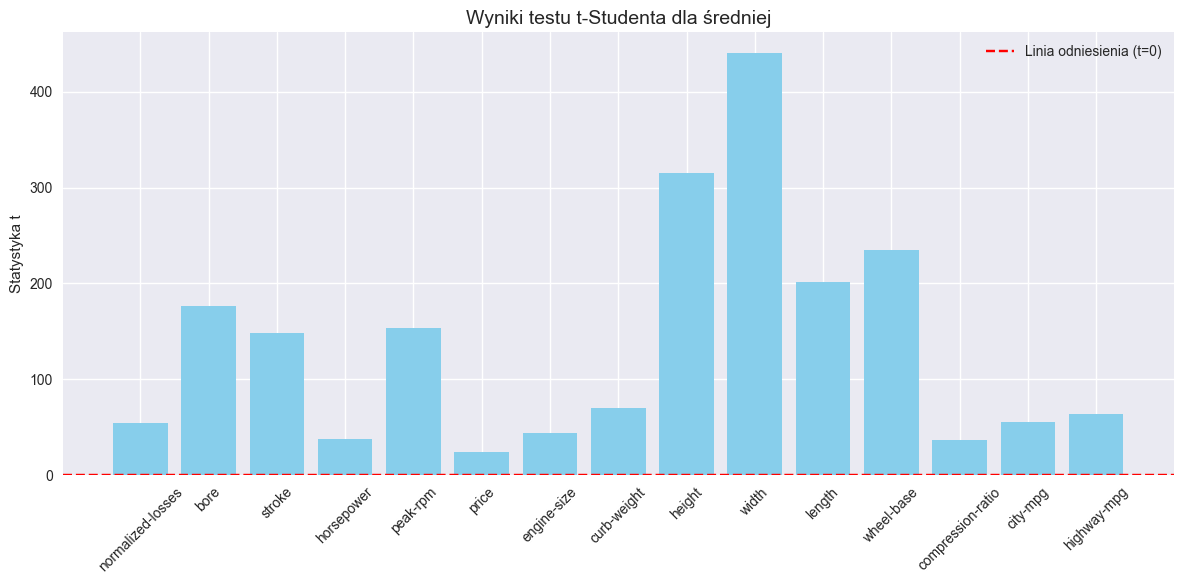

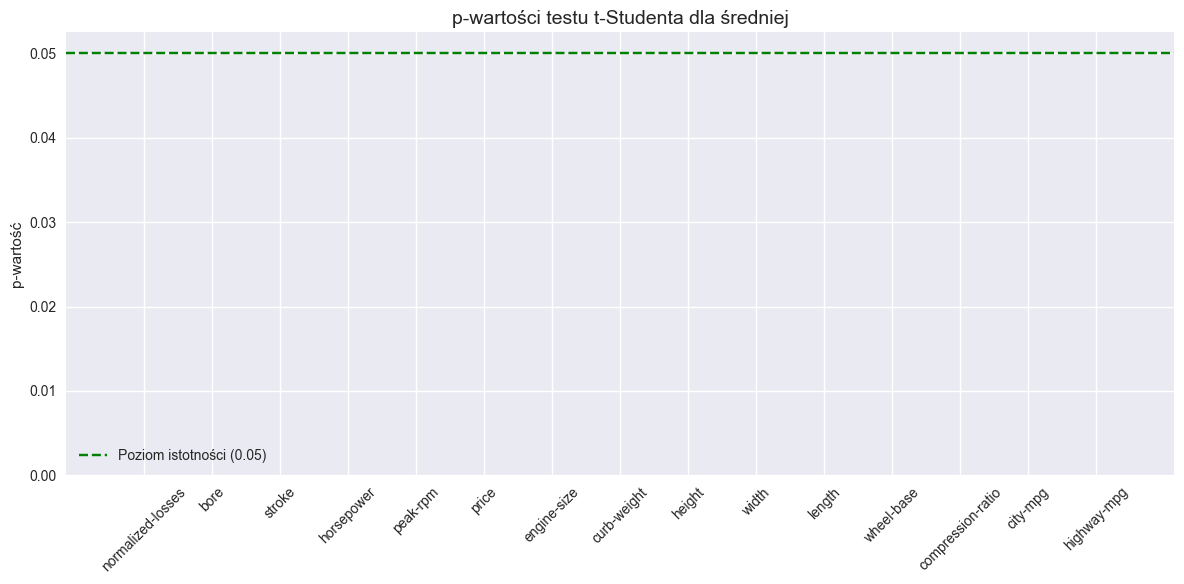

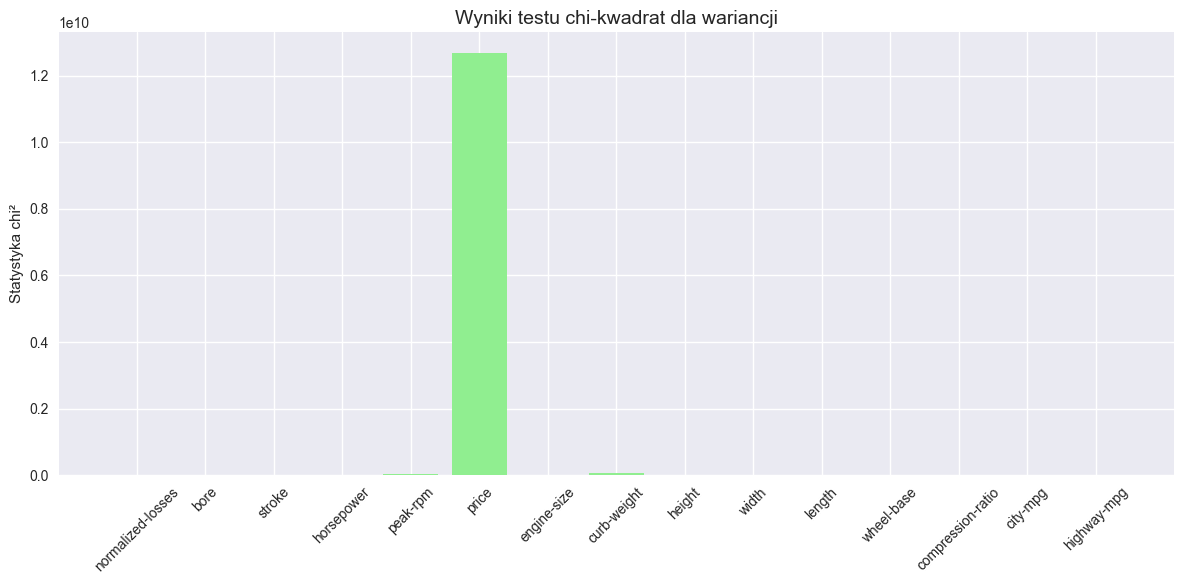

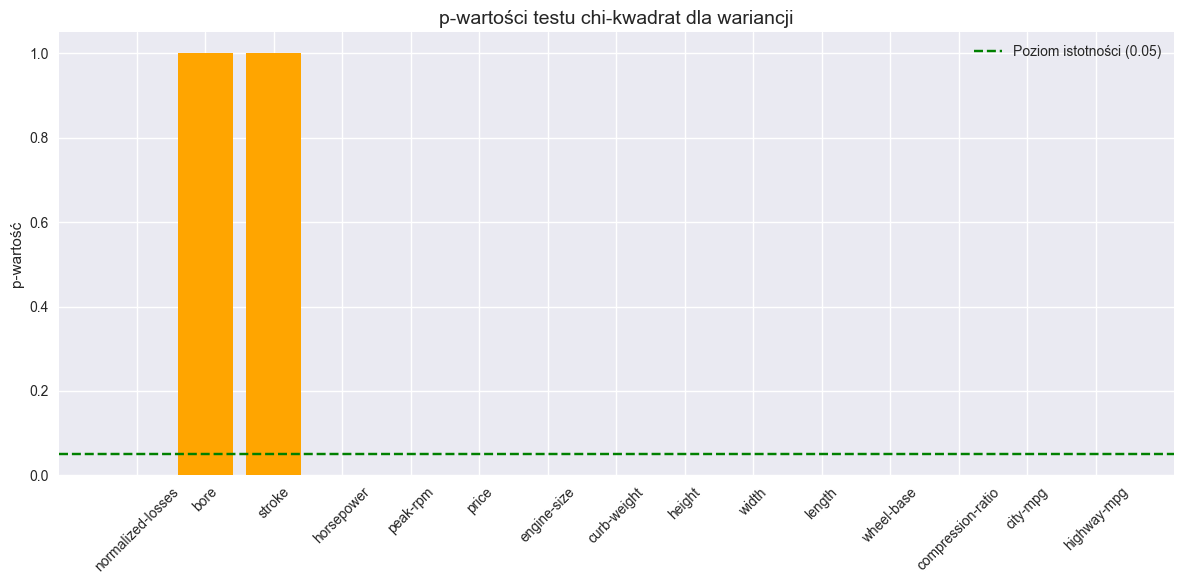

In [12]:
t_stats = []
p_values_t = []

for var in continuous_vars:
    data = df[var].dropna()
    t_stat, p_value = stats.ttest_1samp(data, 0)
    t_stats.append(t_stat)
    p_values_t.append(p_value)

plt.figure(figsize=(12, 6))
plt.bar(continuous_vars, t_stats, color='skyblue')
plt.axhline(y=0, color='red', linestyle='--', label='Linia odniesienia (t=0)')
plt.title('Wyniki testu t-Studenta dla średniej', fontsize=14)
plt.ylabel('Statystyka t')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(continuous_vars, p_values_t, color='salmon')
plt.axhline(y=0.05, color='green', linestyle='--', label='Poziom istotności (0.05)')
plt.title('p-wartości testu t-Studenta dla średniej', fontsize=14)
plt.ylabel('p-wartość')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

chi2_stats = []
p_values_chi2 = []

for var in continuous_vars:
    data = df[var].dropna()
    n = len(data)
    sample_var = np.var(data, ddof=1)
    chi2_stat = (n - 1) * sample_var / 1
    p_value = stats.chi2.sf(chi2_stat, df=n-1)
    chi2_stats.append(chi2_stat)
    p_values_chi2.append(p_value)

plt.figure(figsize=(12, 6))
plt.bar(continuous_vars, chi2_stats, color='lightgreen')
plt.title('Wyniki testu chi-kwadrat dla wariancji', fontsize=14)
plt.ylabel('Statystyka chi²')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(continuous_vars, p_values_chi2, color='orange')
plt.axhline(y=0.05, color='green', linestyle='--', label='Poziom istotności (0.05)')
plt.title('p-wartości testu chi-kwadrat dla wariancji', fontsize=14)
plt.ylabel('p-wartość')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Wykorzystanie testów statystycznych dla średniej i wariancji

Aby ocenić właściwości statystyczne cech numerycznych w zbiorze danych *Automobile*, przeprowadzono dwa typy testów:

- **Test t-Studenta dla średniej** – sprawdzający, czy średnia danej zmiennej różni się istotnie od zera,
- **Test chi-kwadrat dla wariancji** – weryfikujący, czy wariancja zmiennej jest istotnie różna od wartości teoretycznej.

---

### Test t-Studenta dla średniej

Wyniki testu t-Studenta zostały przedstawione na dwóch wykresach:

- **Pierwszy wykres** prezentuje wartości statystyki t dla każdej zmiennej,
- **Drugi wykres** pokazuje odpowiadające im wartości p (*p-values*), które służą do oceny istotności statystycznej.

#### Wnioski:

- Wszystkie zmienne mają **wartości p znacznie poniżej progu istotności 0.05**, co oznacza, że **średnia każdej zmiennej jest istotnie różna od zera**.
- Szczególnie wysokie statystyki t zaobserwowano dla cech takich jak `width`, `height`, `wheel-base` czy `length` — oznacza to, że ich średnie są silnie oddalone od zera w ujęciu statystycznym.
- Wyniki te potwierdzają, że zmienne te zawierają **informację statystycznie istotną** i mogą być brane pod uwagę przy dalszym modelowaniu lub analizach.

---

### Test chi-kwadrat dla wariancji

Dwa kolejne wykresy przedstawiają wyniki testu chi-kwadrat:

- **Trzeci wykres** pokazuje wartości statystyki chi² dla wariancji poszczególnych zmiennych,
- **Czwarty wykres** przedstawia odpowiadające im p-wartości.

#### Wnioski:

- Większość zmiennych wykazuje **p-wartości poniżej poziomu istotności 0.05**, co oznacza, że ich wariancje **różnią się istotnie od wartości oczekiwanej** (hipotezy zerowej).
- Wyjątkiem są zmienne `bore` i `stroke`, których **p-wartości są bliskie 1**, co wskazuje na **brak podstaw do odrzucenia hipotezy zerowej** – wariancje tych zmiennych są zgodne z teoretycznym założeniem.
- Szczególnie wyróżnia się zmienna `price`, która osiąga **bardzo wysoką statystykę chi²**, co oznacza **dużą niestabilność wariancji** — warto rozważyć jej przekształcenie (np. transformację logarytmiczną).

---

### Podsumowanie

Analiza testów statystycznych pozwala wyciągnąć następujące wnioski:

- **Średnie wszystkich zmiennych są istotnie różne od zera**, co wskazuje na ich przydatność w dalszych analizach.
- **Większość zmiennych ma istotnie różną wariancję**, co może sugerować konieczność standaryzacji lub transformacji niektórych cech (szczególnie `price`).
- Zmiennych `bore` i `stroke` **nie trzeba transformować pod względem wariancji**, gdyż nie wykazują odchyleń względem założeń testu.

Wyniki te wspierają decyzje dotyczące dalszego przygotowania danych, m.in. selekcji cech, normalizacji lub inżynierii cech.


# Zadanie 7
### Estymator jądrowy gęstości

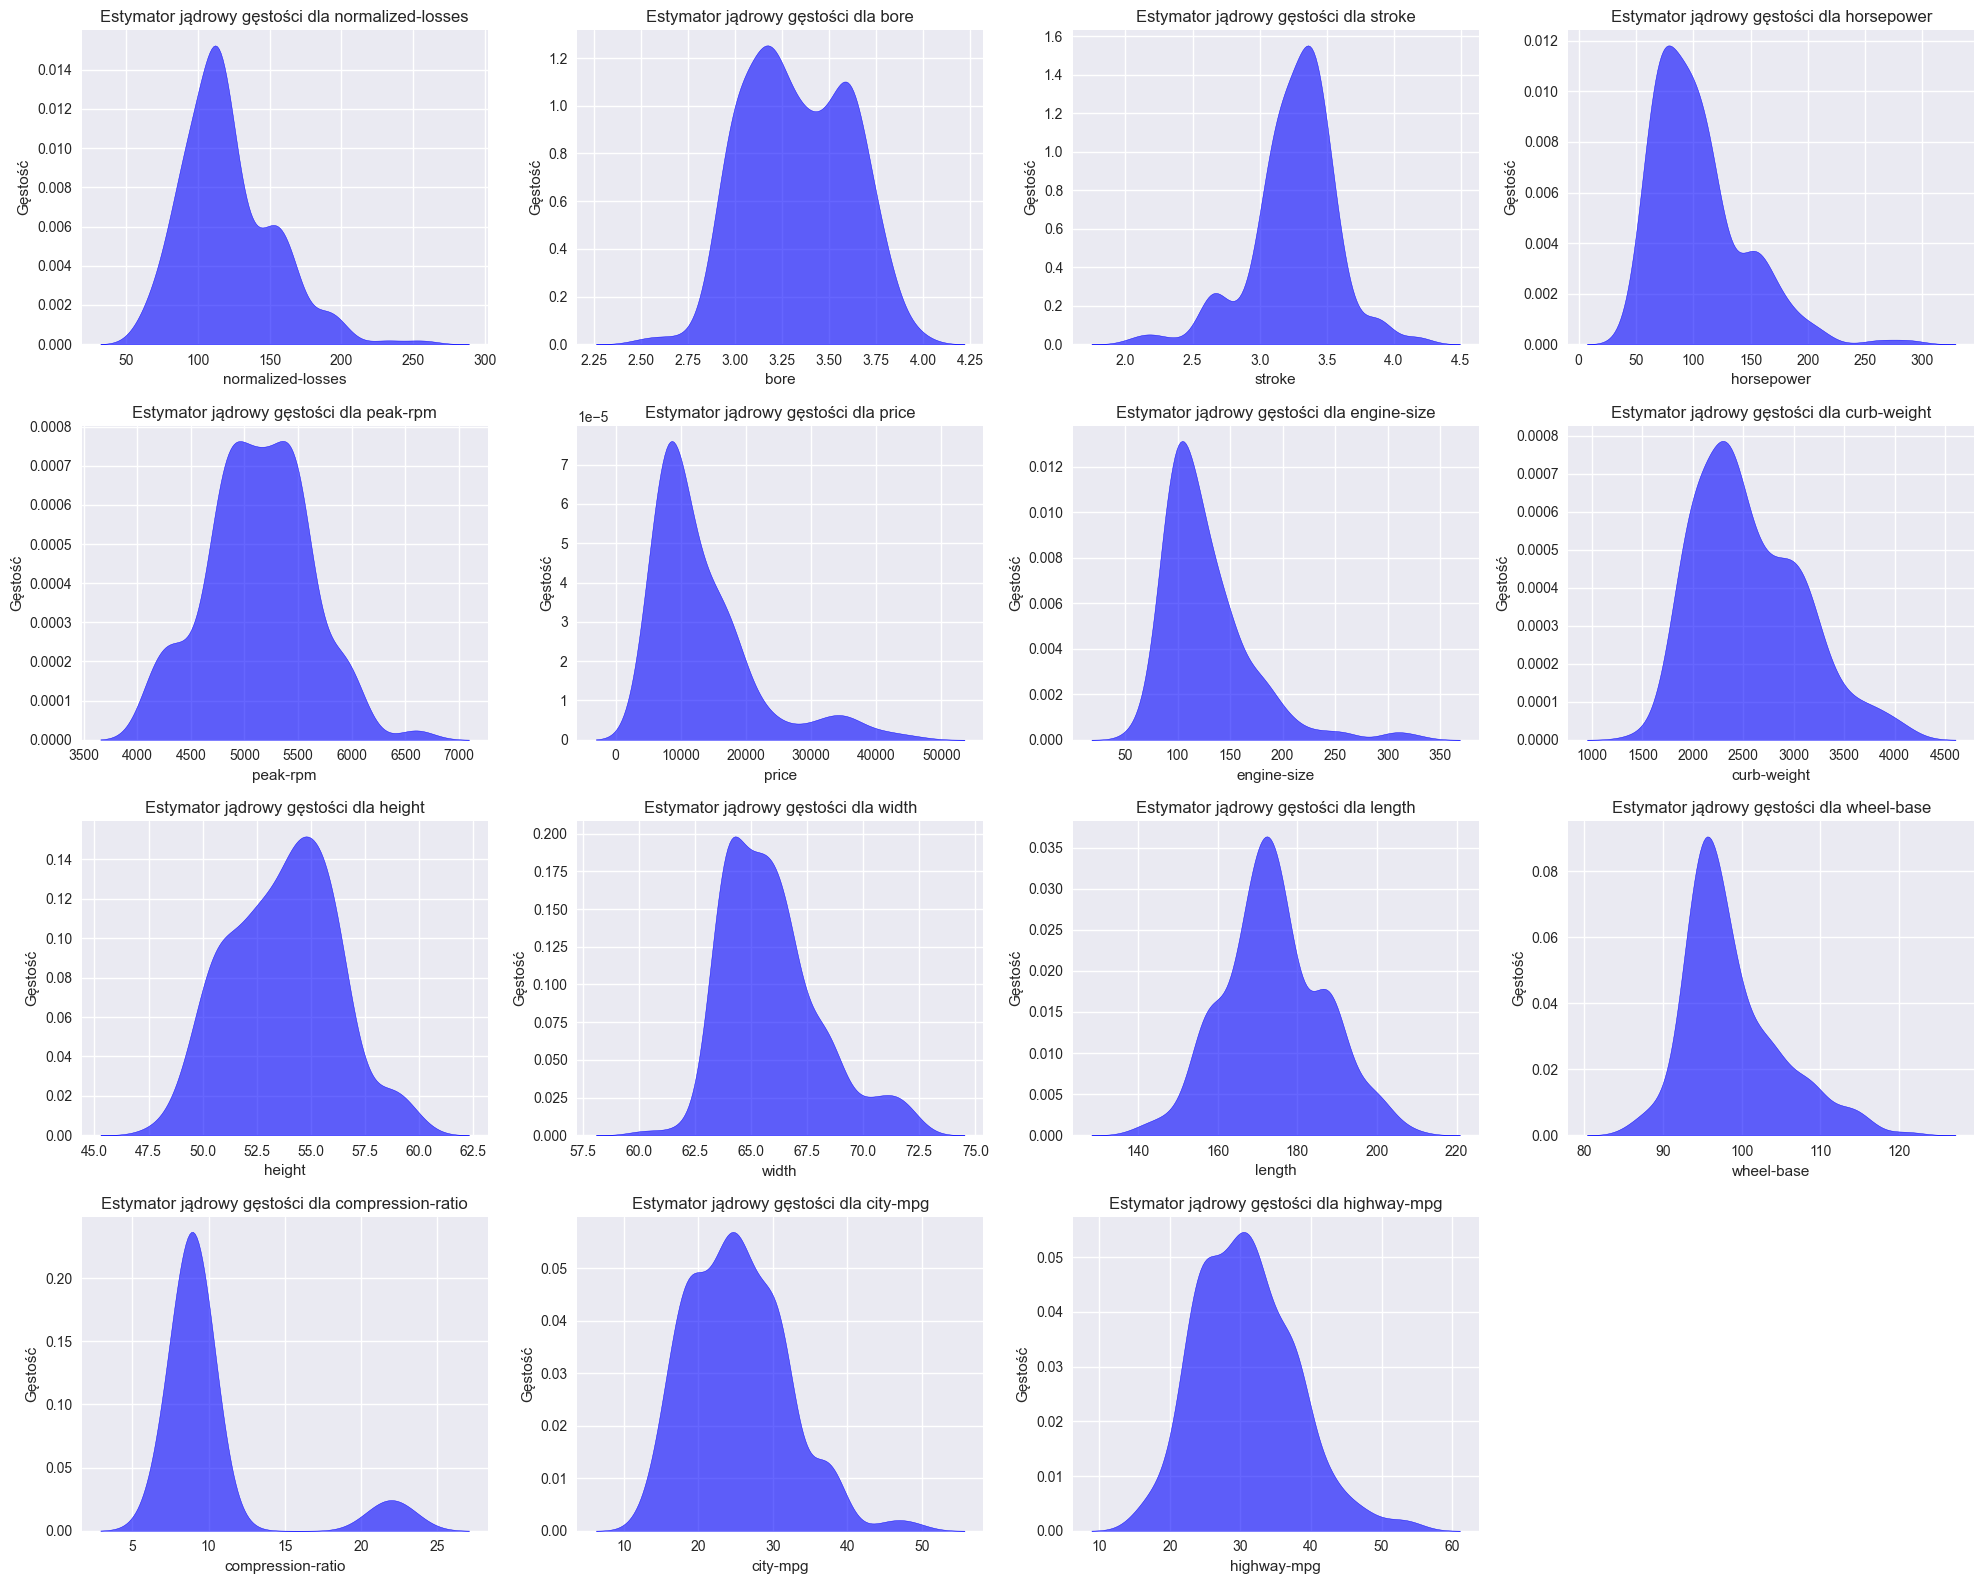

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

automobile = fetch_ucirepo(id=10)
X = automobile.data.features
y = automobile.data.targets
df = pd.concat([X, y], axis=1)

for column in continuous_vars:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].fillna(df[column].median())

fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    if i < len(axes):
        sns.kdeplot(df[var], ax=axes[i], fill=True, color='blue', alpha=0.6)
        axes[i].set_title(f'Estymator jądrowy gęstości dla {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Gęstość')

for j in range(len(continuous_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Analiza rozkładów cech – Estymacja jądrowa gęstości

W celu analizy rozkładu zmiennych numerycznych w zbiorze danych **Automobile** przeprowadzono estymację jądrową gęstości (KDE) dla każdej z cech. Metoda ta umożliwia wygładzenie histogramów i lepsze zrozumienie kształtu rozkładu danych bez wpływu liczby przedziałów histogramu.

### Wnioski z wykresów KDE:

- **Wiele zmiennych ma rozkład asymetryczny** – m.in. `price`, `horsepower`, `engine-size` oraz `compression-ratio` cechują się długim ogonem po prawej stronie. Sugeruje to obecność wartości odstających (ang. *outliers*) – pojedynczych, nietypowo wysokich wartości.

- **Niektóre zmienne mają rozkład zbliżony do normalnego** – np. `peak-rpm`, `height` i `width` są skupione wokół jednej dominującej wartości, co może odzwierciedlać standardy konstrukcyjne wśród producentów samochodów.

- **Zmienna `compression-ratio` wykazuje rozkład dwumodalny**, co może sugerować obecność dwóch różnych klas silników (np. benzynowe vs. wysokoprężne).

- **Zmienne `normalized-losses` i `price` cechuje duża rozpiętość wartości**, co może wymagać dalszego przekształcenia danych (np. transformacji logarytmicznej, standaryzacji) w celu poprawy jakości modeli predykcyjnych.

- **Rozkłady `city-mpg` oraz `highway-mpg` są przesunięte ku lewej**, co oznacza, że większość samochodów ma umiarkowane zużycie paliwa, a jedynie nieliczne cechują się bardzo wysoką efektywnością.

### Znaczenie analizy KDE:

Estymatory jądrowe gęstości pozwalają lepiej zrozumieć strukturę danych, wykryć potencjalne problemy (takie jak wartości odstające, wielomodalność rozkładu czy zmienność) oraz dobrać odpowiednie transformacje zmiennych. Analiza ta jest istotna jako etap przygotowawczy przed zastosowaniem algorytmów uczenia maszynowego lub budową modeli statystycznych.
